In [1]:
import numpy as np
import cypari2
pari = cypari2.Pari()
#from cypari2 import pari
# import matplotlib.pyplot as plt

def dbg_print(o):
    print(o)
    print(o.type())
    print(o.__class__)

# Arithmetic Dictionnary

We briefly recall the formulae involved in the arithmetic dictionnary between primitive and hyperbolc objects, where the objects are integral binary quadratic forms, matrices of $\mathfrak{sl}_2(\mathbb{Q})$ with (half)-integral entries, roots of quadratic polynomials, framed ideals in oriented orders of quadratic fields.

## Quadratic forms and $\mathfrak{sl}_2$ matrices

A quadratic form $Q(x,y)=lx^2+mxy+ry^2$ can be polarised with respect to the (non-degenerate antisymmetric bilinear) determinant form : there is a unique $2\times 2$ traceless integral matrix $a\in\mathfrak{sl}_2(\mathbb{Z})$ such that $Q(v)=\frac{1}{2}\det(v,av)$. 
This matrix has entries :
$$ a=
\begin{pmatrix}
-m & -2r \\
2l & m
\end{pmatrix} $$
and it satisfies $\det(a)=-\Delta$ and $a=-a^\#$ where $a^\#$ is the transconjugate (also known as the comatrix transpose), hence $a^2 = \Delta \mathbb{1}$.

The following functions compute compute the trivial dictionnary between quadratic forms and $\mathfrak{sl}_2$ matrices, and we check it an example.

In [2]:
def sl_matrix_of_form(Q):
    l = pari.component(Q,1)
    mm = pari.component(Q,2)
    r = pari.component(Q,3)
    a = pari.matrix(2,2,[-mm,-2*r,2*l,mm])
    return a

def form_of_matrix(a):
    l = int(a[1,0])//2
    m = int(a[1,1]-a[0,0])//2
    r = int(-a[0,1])//2
    u = np.gcd(l, np.gcd(m,r))
    return pari.Qfb(l//u,m//u,r//u)

In [3]:
some_pari_bqf = pari.Qfb(11, 72, -66)
# pari.Qfb(31, 82, -11)
# 
#pari.Qfb(1,516,-1)
print(some_pari_bqf)
its_matrix = sl_matrix_of_form(some_pari_bqf)
print(its_matrix)
print(some_pari_bqf == form_of_matrix(its_matrix))

Qfb(11, 72, -66)
[-72, 132; 22, 72]
True


In [4]:
M = pari("(1/d)*[-k, 0, 0, d^2-k^2 ; 0, 0, d, 0 ; 0, d, 0, 0 ; 1, 0, 0, k]")
Id4 = pari.matid(4)
PMX = pari.matdet(M-'X'*Id4)
print(pari.matdet(M), '\t', pari.trace(M))
print(PMX)
print(pari.factor(PMX))

1 	 0
(X^4 - 2*X^2 + 1)
[X - 1, 2; X + 1, 2]


## Quadratic forms and quadratic irrationalities

The hyperbolic form $Q$ can be factorised $Q(x,y)=l(x-y\phi_-)(x-y\phi_+)$ in the real quadratic field generated by the roots of $Q(x,1)$: $$\phi_\pm = \frac{-m\pm \sqrt{\Delta}}{2l}.$$ Note that $\phi_+ > \phi_-$ when $l>0$.

Conversely any real quadratic irrationality $\phi$ can be writen as $\frac{-m + \sqrt{\Delta}}{2l}$ for a unique triple $(m,l,\Delta)$ such that $\Delta = m^2-4lr$ for some $r$ satisfying $\gcd(l,m,r)=1$. The integers $(l,m,r)$ define a primitive quadratic form $Q(x,y)$ with $Q(\phi,1)=0$. The quadratic form obtained by considering the Galois conjugate $\phi'$ is $-Q$.

We also recover $\phi_\pm$ from $a$ by choosing eigenvectors $v_\pm=(x_\pm,y_\pm)$ for its eigenvalues $\pm \sqrt{\Delta}$, and setting $\phi_\pm = \frac{x_\pm}{y_\pm}$, thus $\phi_+$ is the attractive fixed point in $\mathbb{RP}^1$.

The following functions extract the root $\phi_+$ of a quadratic form. The first yields a linear expression in the basis $(1,\omega)$ of the quadratic order with discriminant $\Delta$ (we shall explain later what these are) while the second spits out an approximate decimal value.

In [5]:
def exact_first_root_of_form(Q):
    
    l = pari.component(Q,1)
    m = pari.component(Q,2)
    r = pari.component(Q,3)
    f = pari("{}*x^2+{}*x+{}".format(l,m,r))
    
    Delta = pari.poldisc(f)
    # w = (beta+sqrt(Delta))/2 with beta=0,1
    w = pari.quadgen(Delta)
    
    if pari.Mod(Delta,4) == 0 :
        root = 2*w
    elif pari.Mod(Delta,4) == 1 :
        root = 2*w-1
    
    phi = (-m+root)/(2*l)
    return phi

# Remark : the dicriminant of the field Q(sqrt(Delta))
# fundisc = pari.coredisc(Delta)
# but we don't care in so far as we compute with Delta in O_\delta

def approx_first_root_of_form(Q):
    
    l = pari.component(Q,1)
    m = pari.component(Q,2)
    r = pari.component(Q,3)
    f = pari("{}*x^2+{}*x+{}".format(l,m,r))
    
    phi = pari.polroots(f)
    phi0, phi1 = phi[0].real(), phi[1].real()
    
    if l>0 :
        return pari.max(phi0, phi1) 
    elif l<0 :
        return pari.min(phi0, phi1)

In [6]:
print(exact_first_root_of_form(some_pari_bqf))
print(exact_first_root_of_form(some_pari_bqf)*1.)
print(approx_first_root_of_form(some_pari_bqf))

-36/11 + 1/11*w
0.815150391984930
0.815150391984930


The following function returns the continued fraction for the first root of a quadratic form.

In [7]:
def continued_fraction_of_form(Q):
    phi = exact_first_root_of_form(Q)
    apphi = phi*1.
    return pari.contfrac(apphi)

In [8]:
continued_fraction_of_form(some_pari_bqf)

[0, 1, 4, 2, 2, 3, 1, 2, 7, 1, 4, 2, 2, 3, 1, 2, 7, 1, 4, 2, 2, 3, 1, 2]

We know from Legendre that a quadratic irrationality has the shape $\pm \sqrt{p/q}$ iff its continued fraction expansion has palyndromic period $[a_0,\overline{a_1,\dots,a_{p-1},a_p}]$ with $a_p = 2a_0$. The cycle of integers is $(a_1,\dots,a_p)$ or $(a_1,\dots,a_{2p})$ depending on whether $p$ is odd or even.

The quadratic forms corresponding to such irrationalities are those for which $m=0$, which means they are preserved by changing one of the varibles in its opposite.

## Quadratic orders and fields

Let $d$ be a squarefree integer and $\mathbb{K} = \mathbb{Q}(\sqrt{d})$ the quadratic number field generated by its square root.

The integers form the Dedekind ring $\mathcal{O}_\mathbb{K} = \mathbb{Z}[\omega]$ where $\omega = \frac{1+\sqrt{d}}{2}$ if $d \equiv 1 \bmod{4}$ and $\omega =\sqrt{d}$ otherwize.

Its discriminant is $\operatorname{disc}(\mathcal{O}_\mathbb{K}) = D$ where $D=d$ if $d\equiv 1 \bmod{4}$ and $D=4d$ otherwize.

Note that $\omega = \frac{\beta+\sqrt{D}}{2}$ with $D\equiv \beta \bmod{2}$ and $\beta\in\{0,1\}$, thus $x+y\omega = \frac{t+u\sqrt{D}}{2}$ with $t=2x+\beta y$ and $u=y$ whence $\mathcal{O}_\mathbb{K} = \{ \frac{t+u\sqrt{D}}{2} \mid t\equiv \beta u \bmod{2} \}$.

The discriminant of the ring of integers in a quadratic number field is called fundamental.

Here's an example of how to work in the quadratic order of fundamental discriminant.

In [9]:
d = 399 # is squarefree and 3 mod 4
print('factorisation(d)=', pari.factor(d)) # prime factorisation
D = 4*d # discriminant of the field extension
w = pari.quadgen(D) # create omega

print('isfundamental(D)=', pari.isfundamental(D)==1)
print('trace(w) = ', pari.trace(w), '\t', 'norm(w) =', pari.norm(w), '\t',\
      'charpoly(w)=', pari.charpoly(w))

factorisation(d)= [3, 1; 7, 1; 19, 1]
isfundamental(D)= True
trace(w) =  0 	 norm(w) = -399 	 charpoly(w)= x^2 - 399


We can also work in any other quadratic order $\mathcal{O}$ of the quadratic field, which is a subring $\mathcal{O} \subset \mathbb{Q}(\sqrt{d})$ of finite rank as $\mathbb{Z}$-module such that $\mathcal{O}\otimes_\mathbb{Z} \mathbb{Q} = \mathbb{Q}(\sqrt{d})$.

The ring of integers is an order, which contains every other in that field. If $\mathcal{O}$ is such an order, then it is uniquely determined by its (finite) index $f=[\mathcal{O}_K\colon \mathcal{O}]$, or equivalently by its discriminant $\Delta = Df^2$ and $\mathcal{O}=\mathbb{Z}+f\cdot \mathbb{Z}[\omega]$.

One can also write this $\mathbb{Z}[\omega_f]$ where $\omega_f = \frac{\beta+f\sqrt{D}}{2}$ for $\beta\in \{0,1\}$ and $D\equiv \beta \bmod{2}$. Note that $\omega_f = \frac{\beta+\sqrt{\Delta}}{2}$ so one can still write $\mathcal{O}_\Delta = \{ \frac{t+u\sqrt{\Delta}}{2} \mid t\equiv \beta u \bmod{2} \}$, keeping in mind the change of variables $x+y\omega_f = \frac{t+u\sqrt{\Delta}}{2}$.

When $D\equiv 0 \bmod{4}$ we may clear the $2$ from the denominators and get $\mathcal{O}_\Delta=\mathbb{Z}[f\sqrt{d}]$, but the variables involved in this notation are dangerous as they may lead to parity mistakes : $x+y\omega_f = \frac{t}{2}+uf\sqrt{d}$ with $t=2x$ and $y=u$.

In [10]:
Dff = D*(11**2) # the discriminant
wff = pari.quadgen(Dff) # the omega_f
print('isfundamental(Df^2)=', pari.isfundamental(Dff)==1)
print('trace(wf) = ', pari.trace(wff), '\t', 'norm(wf) =', pari.norm(wff), '\t',\
      'charpoly(wf)=', pari.charpoly(wff))

isfundamental(Df^2)= False
trace(wf) =  0 	 norm(wf) = -48279 	 charpoly(wf)= x^2 - 48279


Thus quadratic orders are in bijection with the set of discriminants : non-square integers congruent to $0,1 \bmod{4}$, and one may denote $\mathcal{O}_{\Delta}$ the unique quadratic order of discriminant $\Delta = Df^2$, with $D$ fundamental ; in particular $\mathcal{O}_D= \mathcal{O}_\mathbb{K}$.

So for each square-free integer $d$, the orders $\mathcal{O}_\Delta$ in the corresponding quadratic field $\mathbb{Q}(\sqrt{d})$ form a poset under inclusion whose maximal element $\mathcal{O}_{D}$ is the ring of integers, and that poset is canonically isomorphic via the index $f = [\mathcal{O}_D \colon \mathcal{O}_\Delta]$, to the poset of positive integers $f \in \mathbb{N}^*$ under divisibility.

Here are a couple of fundamental discriminants, along with a poset of discriminants corresponding to orders in the same number field.

In [11]:
# A few examples

Sqf234 = [15, 10, 79, 229, 219, 145, 195, 130]
Disc234 = [d if d%4==1 else 4*d for d in Sqf234]

# Further examples

Sqf5678 = [439, 401, 427, 346, 1087, 577, 399, 442]
Disc5678 = [d if d%4==1 else 4*d for d in Sqf5678]

# Combining examples 2345678

Sqfs = Sqf234 + Sqf5678
Discs = [d if d%4==1 else 4*d for d in Sqfs]

# Further examples of fundamental disc with principal ring
SqfFunPrinc = [2, 5, 13, 17, 29, 37, 41, 53, 61, 73, 89, 97]
DiscsFunPrinc = [d if d%4==1 else 4*d for d in SqfFunPrinc]

# Further examples of fundamental disc with principal ring
SqfFunPrincSym = [3, 6, 7, 11, 14, 19, 21, 22, 23, 31, 33, 38, 43, 46, 47]
DiscsFunPrincSym = [d if d%4==1 else 4*d for d in SqfFunPrincSym]

# And a poset of disc orders
DiscPoset = [4*399, 4*399*3**2, 4*399*5**2, 4*399*11**2, 4*399*(11*5)**2]

They have been chosen for their properties pertaining to fundamental units and class groups, which we shall explain and expermient with in a moment.

Le us just say for now that for every abelian group $G$ of order $\le 8$, and every sign $\pm 1$, we selected one of the smallest fundamental discriminant with class group $G$ and fundamental unit of that sign.

This has been done mostly by inspection of an appendix in Borevich and Shafarevich's introduction to number theory, which is enough for our purposes, but could of course be done systematically with PARI GP.

In [12]:
print('\n', 'Some fundamental discriminants', '\n')
for (sqf, disc) in zip(Sqfs, Discs):
    print('d=', sqf, '\t D=', disc, \
          '\t isfunda=', pari.isfundamental(disc)==1,\
          '\t classno=', pari.qfbclassno(disc), \
          '\t sign=', pari.norm(pari.quadunit(disc)))

print('\n', 'Poset of orders in Q(sqrt(4*399))', '\n')
for disc in DiscPoset :
    print('D=', disc, \
          '\t isfunda=', pari.isfundamental(disc)==1, \
          '\t classno=', pari.qfbclassno(disc), \
          '\t sign=', pari.norm(pari.quadunit(disc)))

print('\n', 'Some fundamental principal discriminants', '\n')
for disc in DiscsFunPrinc :
    print('D=', disc, \
          '\t isfunda=', pari.isfundamental(disc)==1, \
          '\t classno=', pari.qfbclassno(disc), \
          '\t sign=', pari.norm(pari.quadunit(disc)))

print('\n', 'Some fundamental sym-principal discriminants', '\n')
for disc in DiscsFunPrincSym :
    print('D=', disc, \
          '\t isfunda=', pari.isfundamental(disc)==1, \
          '\t classno=', pari.qfbclassno(disc), \
          '\t sign=', pari.norm(pari.quadunit(disc)))


 Some fundamental discriminants 

d= 15 	 D= 60 	 isfunda= True 	 classno= 2 	 sign= 1
d= 10 	 D= 40 	 isfunda= True 	 classno= 2 	 sign= -1
d= 79 	 D= 316 	 isfunda= True 	 classno= 3 	 sign= 1
d= 229 	 D= 229 	 isfunda= True 	 classno= 3 	 sign= -1
d= 219 	 D= 876 	 isfunda= True 	 classno= 4 	 sign= 1
d= 145 	 D= 145 	 isfunda= True 	 classno= 4 	 sign= -1
d= 195 	 D= 780 	 isfunda= True 	 classno= 4 	 sign= 1
d= 130 	 D= 520 	 isfunda= True 	 classno= 4 	 sign= -1
d= 439 	 D= 1756 	 isfunda= True 	 classno= 5 	 sign= 1
d= 401 	 D= 401 	 isfunda= True 	 classno= 5 	 sign= -1
d= 427 	 D= 1708 	 isfunda= True 	 classno= 6 	 sign= 1
d= 346 	 D= 1384 	 isfunda= True 	 classno= 6 	 sign= -1
d= 1087 	 D= 4348 	 isfunda= True 	 classno= 7 	 sign= 1
d= 577 	 D= 577 	 isfunda= True 	 classno= 7 	 sign= -1
d= 399 	 D= 1596 	 isfunda= True 	 classno= 8 	 sign= 1
d= 442 	 D= 1768 	 isfunda= True 	 classno= 8 	 sign= -1

 Poset of orders in Q(sqrt(4*399)) 

D= 1596 	 isfunda= True 	 classno= 8 

## Factorisation of our discriminants

For future reference, let us display the prime decompositions of our fundamental discriminants.

In [13]:
print('Prime factor decompositions of our fundamental discriminants')
for disc in Discs:
    print(disc, '=', pari.factor(disc))

print('\n Prime factor decompositions of our poset discriminants')
for disc in DiscPoset:
    print(disc, '=', pari.factor(disc))

print('\n Prime factor decompositions of DiscsFunPrinc')
for disc in DiscsFunPrinc:
    print(disc, '=', pari.factor(disc))

print('\n Prime factor decompositions of DiscsFunPrincSym')
for disc in DiscsFunPrincSym:
    print(disc, '=', pari.factor(disc))

Prime factor decompositions of our fundamental discriminants
60 = [2, 2; 3, 1; 5, 1]
40 = [2, 3; 5, 1]
316 = [2, 2; 79, 1]
229 = Mat([229, 1])
876 = [2, 2; 3, 1; 73, 1]
145 = [5, 1; 29, 1]
780 = [2, 2; 3, 1; 5, 1; 13, 1]
520 = [2, 3; 5, 1; 13, 1]
1756 = [2, 2; 439, 1]
401 = Mat([401, 1])
1708 = [2, 2; 7, 1; 61, 1]
1384 = [2, 3; 173, 1]
4348 = [2, 2; 1087, 1]
577 = Mat([577, 1])
1596 = [2, 2; 3, 1; 7, 1; 19, 1]
1768 = [2, 3; 13, 1; 17, 1]

 Prime factor decompositions of our poset discriminants
1596 = [2, 2; 3, 1; 7, 1; 19, 1]
14364 = [2, 2; 3, 3; 7, 1; 19, 1]
39900 = [2, 2; 3, 1; 5, 2; 7, 1; 19, 1]
193116 = [2, 2; 3, 1; 7, 1; 11, 2; 19, 1]
4827900 = [2, 2; 3, 1; 5, 2; 7, 1; 11, 2; 19, 1]

 Prime factor decompositions of DiscsFunPrinc
8 = Mat([2, 3])
5 = Mat([5, 1])
13 = Mat([13, 1])
17 = Mat([17, 1])
29 = Mat([29, 1])
37 = Mat([37, 1])
41 = Mat([41, 1])
53 = Mat([53, 1])
61 = Mat([61, 1])
73 = Mat([73, 1])
89 = Mat([89, 1])
97 = Mat([97, 1])

 Prime factor decompositions of DiscsFunPri

## Fundamental units and continued fractions

We wish to compute the fundamental unit for the discriminant $\Delta$ which is the smallest positive solution to $N(\epsilon)=\epsilon \epsilon'= \pm 1$ in $\mathcal{O}_{\Delta}$.

We start with the fundamental solution to Pell-Fermat's equation $t^2-\Delta u^2 = 4$ such that $t\equiv \beta u\bmod{2}$, it corresponds to the smallest positive solution to $N(\epsilon)=+1$ in $\mathcal{O}_{\Delta}$.

Note that if $\epsilon = \frac{t+u\sqrt{\Delta}}{2} = x+y\omega_f$, then $N(\epsilon)= \frac{t^2-\Delta u^2}{4} = \frac{(2x+\beta)^2-\Delta y^2}{4} = x^2+\beta xy +\frac{\beta-\Delta}{4}y^2$. 

Thus solving the Pell-Fermat equation also amounts to finding vectors $(x,y)\in \mathbb{Z}^2$ on which the principal quadratic form $x^2+\beta xy +\frac{b-\Delta}{4}y^2$ of discriminant $\Delta$ represents $+1$.

In fact during our analysis, we shall not escape considering solutions to the $\pm$ Pell-Fermat equations $t^2-\Delta u^2=\pm 4$.

This can be done by inspecting the successive convergents in the continued fraction expansion of $\sqrt{\Delta}$. It is a classical fact (proven in the work of Legendre) that the continued fraction expasion of $\sqrt{\Delta}$ has the form $[n_0;\overline{n_1,\dots,n_{p}}]$ with $n_p =2 n_0$ and the period $\overline{n_1,\dots,n_{p}}$ cyclically palyndromic.

In [14]:
print('\n', 'Continued fractions of square roots in our fundamental disc', '\n')
for disc in Discs:
    print("\sqrt({0})=".format(disc), pari.contfrac(pari.sqrt(disc)))

print('\n', 'Continued fractions of square roots in disc in our poset', '\n')
for disc in DiscPoset:
    print("\sqrt({0})=".format(disc), pari.contfrac(pari.sqrt(disc)))

print('\n', 'Cont Frac of sqrt{D} for D in DiscsFunPrinc', '\n')
for disc in DiscsFunPrinc:
    print("\sqrt({0})=".format(disc), pari.contfrac(pari.sqrt(disc), nmax=12))

print('\n', 'Cont Frac of sqrt{D} for D in DiscsFunPrincSym', '\n')
for disc in DiscsFunPrincSym:
    print("\sqrt({0})=".format(disc), pari.contfrac(pari.sqrt(disc), nmax=12))


 Continued fractions of square roots in our fundamental disc 

\sqrt(60)= [7, 1, 2, 1, 14, 1, 2, 1, 14, 1, 2, 1, 14, 1, 2, 1, 14, 1, 2, 1, 15]
\sqrt(40)= [6, 3, 12, 3, 12, 3, 12, 3, 12, 3, 12, 3]
\sqrt(316)= [17, 1, 3, 2, 8, 2, 3, 1, 34, 1, 3, 2, 8, 2, 3, 1, 35]
\sqrt(229)= [15, 7, 1, 1, 7, 30, 7, 1, 1, 7, 30, 7, 2]
\sqrt(876)= [29, 1, 1, 2, 14, 2, 1, 1, 58, 1, 1, 2, 14, 2, 1, 1, 59]
\sqrt(145)= [12, 24, 24, 24, 24, 24, 24]
\sqrt(780)= [27, 1, 12, 1, 54, 1, 12, 1, 54, 1, 12, 1, 55]
\sqrt(520)= [22, 1, 4, 11, 4, 1, 44, 1, 4, 11, 4, 1, 44, 1, 4]
\sqrt(1756)= [41, 1, 9, 2, 20, 2, 9, 1, 82, 1, 9, 2, 21]
\sqrt(401)= [20, 40, 40, 40, 40, 40]
\sqrt(1708)= [41, 3, 20, 3, 82, 3, 20, 3, 82, 2]
\sqrt(1384)= [37, 4, 1, 17, 1, 4, 74, 4, 1, 17, 1, 4]
\sqrt(4348)= [65, 1, 15, 2, 32, 2, 15, 1, 130, 1, 15, 2]
\sqrt(577)= [24, 48, 48, 48, 48, 48]
\sqrt(1596)= [39, 1, 18, 1, 78, 1, 18, 1, 78, 1, 19]
\sqrt(1768)= [42, 21, 84, 21, 84, 21]

 Continued fractions of square roots in disc in our poset 

\sqrt(

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_47866/3002291069.py:3: SyntaxWarning: invalid escape sequence '\s'
  print("\sqrt({0})=".format(disc), pari.contfrac(pari.sqrt(disc)))
/tmp/ipykernel_47866/3002291069.py:7: SyntaxWarning: invalid escape sequence '\s'
  print("\sqrt({0})=".format(disc), pari.contfrac(pari.sqrt(disc)))
/tmp/ipykernel_47866/3002291069.py:11: SyntaxWarning: invalid escape sequence '\s'
  print("\sqrt({0})=".format(disc), pari.contfrac(pari.sqrt(disc), nmax=12))
/tmp/ipykernel_47866/3002291069.py:15: SyntaxWarning: invalid escape sequence '\s'
  print("\sqrt({0})=".format(disc), pari.contfrac(par

We can show that every solution $r,s$ to the equations $r^2-\Delta s^2=\pm 1, \pm 4$ with $r,s>0$ will show up as a convergent of $\sqrt{\Delta}$, and each will appear periodically with period $p$ (and increasing values of $r$ and $s$).

More precisely, the smallest solution to $r^2-\Delta s^2= \pm 1$ is given by $r/s=[n_0; n_1,\dots, n_{p-1}]$, and it corresponds to an element of negative norm $r^2-\Delta s^2= - 1$ iff $p$ is odd, in which case the smallest solution of positive norm $r^2-\Delta s^2= + 1$ is given by $r/s=[n_0; n_1,\dots, n_{2p-1}]$. We shall refer to this as Legendre's method.

In [15]:
def norm_of_convergents(dff):
    #print('\n', 'disc={0} which is {1} mod 4 with factorisation {2}'\
    #      .format(dff, dff%4, pari.factor(dff)), '\n')
    expansion = pari.contfrac(pari.sqrt(dff))
    print('expansion(sqrt({0}))='.format(dff), expansion, '\n')
    convergents = pari.contfracpnqn(expansion, 24)
    # display_convergents = ['{0}/{1}'.format(t,u) for (t,u) in convergents]
    # print(convergents) # print(display_convergents) #dbg_print(convergents)
    print('r^2-(dff).s^2 = ','\t','r, s =', '\n')
    for (r,s) in convergents:
        print(r**2-dff*s**2,'\t\t\t', r,s)

def norm_convergents_rootNmodM(N,M):
    print('\n', 'disc={0} which is {1} mod 4 with factorisation {2}'\
          .format(N, N%4, pari.factor(N)), '\n')
    expansion = pari.contfrac(pari.sqrt(N)) #+pari.floor(pari.sqrt(N))
    print('expansion(sqrt({0}))='.format(N), expansion, '\n')
    convergents = pari.contfracpnqn(expansion, 24)
    # display_convergents = ['{0}/{1}'.format(t,u) for (t,u) in convergents]
    # print(convergents) # print(display_convergents) #dbg_print(convergents)
    print('R^2-N.S^2 = ','\t','R, S =', '\t\t', 'R/S mod M',  '\n')
    for (R,S) in convergents:
        if pari.Mod(S,M)==0:
            print(R**2-N*S**2,'\t\t', R,S, '\t\t\t', 'INFINITE')
        else:
            RsurSmodM = pari.Mod(R/S,M)
            print(R**2-N*S**2,'\t\t', R,S, '\t\t\t', RsurSmodM)

In [16]:
#norm_of_convergents(195)
norm_convergents_rootNmodM(7,7)
#norm_convergents_rootNmodM(13,5)
#norm_convergents_rootNmodM(5,11)


 disc=7 which is 3 mod 4 with factorisation Mat([7, 1]) 

expansion(sqrt(7))= [2, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 2] 

R^2-N.S^2 =  	 R, S = 		 R/S mod M 

-3 		 2 1 			 Mod(2, 7)
2 		 3 1 			 Mod(3, 7)
-3 		 5 2 			 Mod(6, 7)
1 		 8 3 			 Mod(5, 7)
-3 		 37 14 			 INFINITE
2 		 45 17 			 Mod(1, 7)
-3 		 82 31 			 Mod(4, 7)
1 		 127 48 			 Mod(6, 7)
-3 		 590 223 			 Mod(5, 7)
2 		 717 271 			 Mod(2, 7)
-3 		 1307 494 			 Mod(3, 7)
1 		 2024 765 			 Mod(4, 7)
-3 		 9403 3554 			 Mod(6, 7)
2 		 11427 4319 			 INFINITE
-3 		 20830 7873 			 Mod(1, 7)
1 		 32257 12192 			 Mod(3, 7)
-3 		 149858 56641 			 Mod(4, 7)
2 		 182115 68833 			 Mod(5, 7)
-3 		 331973 125474 			 Mod(2, 7)
1 		 514088 194307 			 Mod(1, 7)
-3 		 2388325 902702 			 Mod(3, 7)
2 		 2902413 1097009 			 Mod(6, 7)
-3 		 5290738 1999711 			 INFINITE
1 		 8193151 3096720 			 Mod(2, 7)
-3 		 38063342 14386591 			 Mod(1, 7)


This completely resolves the case $D\equiv 0 \bmod{4}$ because instead of solving $t^2-\Delta u^2 = 4$ with $t\equiv 0 \bmod{2}$, we may solve $x^2-\frac{\Delta}{4} y^2 = 1$ without any constraints on $x,y$. In particular we see that the existence of an element of norm $1$ is directly related to the parity of the period $p$ for the continued fraction expansion of $\sqrt{\Delta/4}=f\sqrt{d}$.

Let us try on a few examples to examine the sequence of convergents $r/s$ to $\sqrt{\Delta/4}$ and select the first one for which $r^2-s^2\sqrt{\Delta/4}=1$.

In [17]:
norm_of_convergents(520//4)
print('We find p = 3, the norm is -1, so we go to 2p-1=5 to find x=6499, y=570 \n')
norm_of_convergents(1768//4)
print('We find p = 1, the norm is -1, so we go to 2p-1=2 to find x=883, y=42 \n')

expansion(sqrt(130))= [11, 2, 2, 22, 2, 2, 22, 2, 2, 22, 2, 2, 22, 2, 2] 

r^2-(dff).s^2 =  	 r, s = 

-9 			 11 1
9 			 23 2
-1 			 57 5
9 			 1277 112
-9 			 2611 229
1 			 6499 570
-9 			 145589 12769
9 			 297677 26108
-1 			 740943 64985
9 			 16598423 1455778
-9 			 33937789 2976541
1 			 84474001 7408860
-9 			 1892365811 165971461
9 			 3869205623 339351782
-1 			 9630777057 844675025
We find p = 3, the norm is -1, so we go to 2p-1=5 to find x=6499, y=570 

expansion(sqrt(442))= [21, 42, 42, 42, 42, 42] 

r^2-(dff).s^2 =  	 r, s = 

-1 			 21 1
1 			 883 42
-1 			 37107 1765
1 			 1559377 74172
-1 			 65530941 3116989
1 			 2753858899 130987710
We find p = 1, the norm is -1, so we go to 2p-1=2 to find x=883, y=42 



In [18]:
norm_of_convergents(1596//4) # first from the poset
print('We find p = 2, the norm is +1 and x=20, y=1 \n')
norm_of_convergents(14364//4) # second from the poset
print('We find p = 6, the norm is +1 and x=31940, y=533 \n')
norm_of_convergents(39900//4) # third from the poset
print('We find p = 4, the norm is +1 and x=799, y=8 \n')

expansion(sqrt(399))= [19, 1, 38, 1, 38, 1, 38, 1, 38, 1, 39] 

r^2-(dff).s^2 =  	 r, s = 

-38 			 19 1
1 			 20 1
-38 			 779 39
1 			 799 40
-38 			 31141 1559
1 			 31940 1599
-38 			 1244861 62321
1 			 1276801 63920
-38 			 49763299 2491281
1 			 51040100 2555201
1 			 2040327199 102144120
We find p = 2, the norm is +1 and x=20, y=1 

expansion(sqrt(3591))= [59, 1, 12, 3, 12, 1, 118, 1, 12, 3, 13] 

r^2-(dff).s^2 =  	 r, s = 

-110 			 59 1
9 			 60 1
-38 			 779 13
9 			 2397 40
-110 			 29543 493
1 			 31940 533
-110 			 3798463 63387
9 			 3830403 63920
-38 			 49763299 830427
9 			 153120300 2555201
1 			 2040327199 34048040
We find p = 6, the norm is +1 and x=31940, y=533 

expansion(sqrt(9975))= [99, 1, 6, 1, 198, 1, 6, 1, 198, 1, 7] 

r^2-(dff).s^2 =  	 r, s = 

-174 			 99 1
25 			 100 1
-174 			 699 7
1 			 799 8
-174 			 158901 1591
25 			 159700 1599
-174 			 1117101 11185
1 			 1276801 12784
-174 			 253923699 2542417
25 			 255200500 2555201
1 			 2040327199 20428824

For $D\equiv 1 \bmod{4}$, we must stick to the equation $t^2-\Delta u^2 = 4$ with $t\equiv u \bmod{2}$. For this we go through the convergents $r/s$ of $\sqrt{\Delta}$ and consider the quantity $r^2-\Delta s^2$. If it is $+1$, then $t,u = 2r, 2s$ is a solution ; and if it is $+4$ with $r\equiv s \bmod{2}$ then we also have a solution $t,u = r,s$.

Hence we can first apply Legendre's method to find the smallest solution $(r_1, s_1)$ of $r^2-\Delta s^2 = 1$, and then go through the convergents with $ t < 2 r_1$ or $u< 2 s_1$ to check whether we can find a smaller solution of $t^2-\Delta u^2 = 4$ with $t \equiv u = 1 \bmod{2}$. Then recall that $t=2x+y$ and $u=y$, so $x=\frac{t-u}{2}$ and $y=u$.

In retrospect, if we knew that $y$ is even, ie the fundamental $t,u$ are even, ie that there is no primitive solutions to $t^2-\Delta u^2 = 4$), then we could stick to the systematic method of Legendre. Alas i am not aware of any general result concerning the parity of $t,u=y$ ; nor do i know any better method to localise a small solution of $t^2-\Delta u^2 = 4$ other than going through them untill one is found.

In [19]:
norm_of_convergents(229)
print('Fund Sol : (r,s)= (227, 15) have norm 4 and both 1 mod 2 \n', \
      'thus (t,u) = (r,s) and (x,y)= (106, 15)')
norm_of_convergents(145)
print('Fund Sol : (r,s)= (289, 24) have norm 1 \n', \
      'thus (t,u) = (578,48) and (x,y)= (265, 48)')

expansion(sqrt(229))= [15, 7, 1, 1, 7, 30, 7, 1, 1, 7, 30, 7, 2] 

r^2-(dff).s^2 =  	 r, s = 

-4 			 15 1
15 			 106 7
-15 			 121 8
4 			 227 15
-1 			 1710 113
4 			 51527 3405
-15 			 362399 23948
15 			 413926 27353
-4 			 776325 51301
1 			 5848201 386460
-4 			 176222355 11645101
15 			 1239404686 81902167
4 			 2655031727 175449435
Fund Sol : (r,s)= (227, 15) have norm 4 and both 1 mod 2 
 thus (t,u) = (r,s) and (x,y)= (106, 15)
expansion(sqrt(145))= [12, 24, 24, 24, 24, 24, 24] 

r^2-(dff).s^2 =  	 r, s = 

-1 			 12 1
1 			 289 24
-1 			 6948 577
1 			 167041 13872
-1 			 4015932 333505
1 			 96549409 8017992
-1 			 2321201748 192765313
Fund Sol : (r,s)= (289, 24) have norm 1 
 thus (t,u) = (578,48) and (x,y)= (265, 48)


Fortunately, instead of going through this case analysis by hand, we can ask Pari to compute the fundamental unit of the quadratic order $\mathcal{O}_{Df^2}$, which we recall is the smallest positive solution to the equation $N(\epsilon)=\pm 1$ ; and then Pell-Fermat's fundamental unit equals $\epsilon$ or $\epsilon^2$ depending on whether $N(\epsilon)= \pm 1$.

The fundamental unit has norm $-1$ precisely when there exists an automorph for the order's principal quadratic form in $\operatorname{PGL}_2(\mathbb{Z})$ which is not in $\operatorname{PSL}_2(\mathbb{Z})$. Note from our experiments that the existence of a unit with norm $-1$ is uncorelated to the residue $D \bmod{4}$.

In [20]:
FundUnits = [pari.quadunit(D) for D in Discs]
NormUnits = [pari.norm(epsilon) for epsilon in FundUnits]
PFundUnits = [pari.quadunit(disc) if pari.norm(pari.quadunit(disc))==1 \
            else pari.quadunit(disc)**2 for disc in Discs]

for (disc, fund, norm, pfund) in zip(Discs, FundUnits, NormUnits, PFundUnits):
    print('disc=', disc, 'fund=', fund, '\t', 'norm=', norm, '\t','Pos Fun Unit=', pfund)

disc= 60 fund= 4 + w 	 norm= 1 	 Pos Fun Unit= 4 + w
disc= 40 fund= 3 + w 	 norm= -1 	 Pos Fun Unit= 19 + 6*w
disc= 316 fund= 80 + 9*w 	 norm= 1 	 Pos Fun Unit= 80 + 9*w
disc= 229 fund= 7 + w 	 norm= -1 	 Pos Fun Unit= 106 + 15*w
disc= 876 fund= 74 + 5*w 	 norm= 1 	 Pos Fun Unit= 74 + 5*w
disc= 145 fund= 11 + 2*w 	 norm= -1 	 Pos Fun Unit= 265 + 48*w
disc= 780 fund= 14 + w 	 norm= 1 	 Pos Fun Unit= 14 + w
disc= 520 fund= 57 + 5*w 	 norm= -1 	 Pos Fun Unit= 6499 + 570*w
disc= 1756 fund= 440 + 21*w 	 norm= 1 	 Pos Fun Unit= 440 + 21*w
disc= 401 fund= 19 + 2*w 	 norm= -1 	 Pos Fun Unit= 761 + 80*w
disc= 1708 fund= 62 + 3*w 	 norm= 1 	 Pos Fun Unit= 62 + 3*w
disc= 1384 fund= 93 + 5*w 	 norm= -1 	 Pos Fun Unit= 17299 + 930*w
disc= 4348 fund= 1088 + 33*w 	 norm= 1 	 Pos Fun Unit= 1088 + 33*w
disc= 577 fund= 23 + 2*w 	 norm= -1 	 Pos Fun Unit= 1105 + 96*w
disc= 1596 fund= 20 + w 	 norm= 1 	 Pos Fun Unit= 20 + w
disc= 1768 fund= 21 + w 	 norm= -1 	 Pos Fun Unit= 883 + 42*w


Recall we recover the pairs $t,u$ from the fundamental solution $x+y\omega$ by the simple change of variables $t=2x+\beta$ and $u=y$.

The following function will be of use to extract from the discriminant $\Delta$, the pair $(t,u)$ yielding the positive fundamental unit in $\mathcal{O}_\Delta$, which is the smallest real quadratic surd $\epsilon = \frac{t+u\sqrt{\Delta}}{2}$ solving the equation $N(\epsilon)=1$.

In [21]:
def pos_fund_unit(disc):
    w = pari.quadgen(disc)
    funit = pari.quadunit(disc)
    pfu = funit if pari.norm(funit)==1 else funit**2        
    t = pari.trace(pfu)
    u = pari.imag(pfu)
    return(disc, pfu, t, u)

We apply it to our poset of non-fundamental discriminants.

In [22]:
for disc in DiscPoset : 
    print(pos_fund_unit(disc)[0:2])

(1596, 20 + w)
(14364, 31940 + 533*w)
(39900, 799 + 8*w)
(193116, 51040100 + 232291*w)
(4827900, 5210183616019999 + 4742462347640*w)


We can check that the pairs $(x,y)$ obtained from examining the continued fractions, and from the pari function ($x+y\omega$ in column "Pos Fun Unit") indeed coincide : Pari is worthy to trust :)


For $disc = 520$ : the fundamental unit $57 + 5 \omega$ has norm $-1$, so take the square to get the positive unit $6499 + 570*\omega$ as found by inspection and $(t,u)=(12998, 570)$.

For $disc = 1768$ : the fundamental unit $21+\omega$ has norm $-1$, so take the square to get the positive unit $883 + 42*\omega$ as found by inspection and $(t,u)= (1766, 42)$.


For $disc = 1596$ : the fundamental unit $20+\omega$ has norm $+1$, so it is equal to the positive unit as found by inspection and $(t,u)=(12998, 570)$.

For $disc = 14364$ : the fundamental unit $31940+533\omega$ has norm $+1$, so it is equal to the positive unit as found by inspection and $(t,u)=(63880, 533)$.

For $disc = 39900$ : the fundamental unit $799+8\omega$ has norm $+1$, so it is equal to the positive unit as found by inspection and $(t,u)=(1598, 8)$.


For $disc = 229$ : the fundamental unit $7+\omega$ has norm $-1$, so take the square to get the positive unit $106 + 15*\omega$ as found by inspection and $(t,u)=(227, 15)$.

For $disc = 145$ : the fundamental unit $11+2\omega$ has norm $-1$, so take the square to get the positive unit $265 + 48*\omega$ as found by inspection and $(t,u)=(578, 48)$.

## Continued fractions of fundamental units

Now we look at continued fraction expansions. Note that the Pell Fermat unit, which is equal to the fundamental unit $\epsilon$ iff $N(\epsilon)=1$ (in which case we have not displayed it twice), always has a decomposition of the form $[a+1,1,\overline{a,1}]$ !

In [23]:
print('\n', 'Continued fractions for square roots of our fundamental disc', '\n')
for disc in Discs:
    w = pari.quadgen(disc)
    epsilon = pari.quadunit(disc)
    print("\sqrt({0})=".format(disc), '\t', pari.contfrac(pari.sqrt(disc)))
    print("omega =", '\t', pari.contfrac(w*1.))
    print("epsilon =", '\t', pari.contfrac(epsilon*1.))
    if epsilon.norm()==-1:
        print("Pell-Fermat = ", '\t', pari.contfrac(epsilon**2*1.))
    print('\n')

print('\n', 'Continued fractions for square roots of disc in our poset', '\n')
for disc in DiscPoset:
    w = pari.quadgen(disc)
    epsilon = pari.quadunit(disc)
    print("\sqrt({0})=".format(disc), '\t', pari.contfrac(pari.sqrt(disc)))
    print("omega =", '\t', pari.contfrac(w*1.))
    print("epsilon =", '\t', pari.contfrac(epsilon*1.))
    if epsilon.norm()==-1:
        print("Pell-Fermat = ", '\t', pari.contfrac(epsilon**2*1.))
    print('\n')

print('\n', 'Cont Frac for sqrt of principal fundamental disc', '\n')
for disc in DiscsFunPrinc:
    w = pari.quadgen(disc)
    epsilon = pari.quadunit(disc)
    print("\sqrt({0})=".format(disc), '\t', pari.contfrac(pari.sqrt(disc)))
    print("omega =", '\t', pari.contfrac(w*1.))
    print("epsilon =", '\t', pari.contfrac(epsilon*1.))
    if epsilon.norm()==-1:
        print("Pell-Fermat = ", '\t', pari.contfrac(epsilon**2*1.))
    print('\n')

print('\n', 'Cont Frac for sqrt of principal fundamental disc', '\n')
for disc in DiscsFunPrincSym:
    w = pari.quadgen(disc)
    epsilon = pari.quadunit(disc)
    print("\sqrt({0})=".format(disc), '\t', pari.contfrac(pari.sqrt(disc)))
    print("omega =", '\t', pari.contfrac(w*1.))
    print("epsilon =", '\t', pari.contfrac(epsilon*1.))
    if epsilon.norm()==-1:
        print("Pell-Fermat = ", '\t', pari.contfrac(epsilon**2*1.))
    print('\n')


 Continued fractions for square roots of our fundamental disc 

\sqrt(60)= 	 [7, 1, 2, 1, 14, 1, 2, 1, 14, 1, 2, 1, 14, 1, 2, 1, 14, 1, 2, 1, 15]
omega = 	 [3, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 7]
epsilon = 	 [7, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 7]


\sqrt(40)= 	 [6, 3, 12, 3, 12, 3, 12, 3, 12, 3, 12, 3]
omega = 	 [3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
epsilon = 	 [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
Pell-Fermat =  	 [37, 1, 36, 1, 36, 1, 36, 1, 36, 1, 37]


\sqrt(316)= 	 [17, 1, 3, 2, 8, 2, 3, 1, 34, 1, 3, 2, 8, 2, 3, 1, 35]
omega = 	 [8, 1, 7, 1, 16, 1, 7, 1, 16, 1, 7, 1, 16, 1, 7, 1, 17]
epsilon = 	 [159, 1, 158, 1, 158, 1, 159]


\sqrt(229)= 	 [15, 7, 1, 1, 7, 30, 7, 1, 1, 7, 30, 7, 2]
omega = 	 [8, 15, 15, 15, 15, 15, 15, 15]
epsilon = 	 [15, 15, 15, 15, 15, 15, 15, 15]
Pell-Fermat =  	 [226, 1, 225, 1, 225, 1, 226]


\sqrt(876)= 	 [29, 1, 1, 2, 14, 2, 1, 1, 58, 1, 1, 2, 14, 2, 1, 1, 59]
omega = 	 [14, 1, 3, 1, 28, 1, 3, 1, 28, 1, 3, 1

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_47866/460142174.py:5: SyntaxWarning: invalid escape sequence '\s'
  print("\sqrt({0})=".format(disc), '\t', pari.contfrac(pari.sqrt(disc)))
/tmp/ipykernel_47866/460142174.py:16: SyntaxWarning: invalid escape sequence '\s'
  print("\sqrt({0})=".format(disc), '\t', pari.contfrac(pari.sqrt(disc)))
/tmp/ipykernel_47866/460142174.py:27: SyntaxWarning: invalid escape sequence '\s'
  print("\sqrt({0})=".format(disc), '\t', pari.contfrac(pari.sqrt(disc)))
/tmp/ipykernel_47866/460142174.py:38: SyntaxWarning: invalid escape sequence '\s'
  print("\sqrt({0})=".format(disc), '\t', par

Let us proove the previous observation.

For this we recall the definition of the Pell-Fermat unit of $\mathcal{O}_\Delta$ : it is the generator $\varphi>1$ of the group of units with positive norm $N(\varphi)=1$ in the quadratic order $\mathcal{O}_\Delta$ of discriminant $\Delta$. Equivalently, it is the smallest element $\varphi$ in the order $\mathcal{O}_\Delta$ which has norm $\varphi \varphi'=(t^2-\Delta u^2)/4 =1$ and which is greater than $1$. In other words, the doubles of its coordinates $t,u$ in the basis $1,\sqrt{\Delta}$, defined as $\varphi = (t+u\sqrt{\Delta})/2$, are the smallest positive solutions to the Pell-Fermat equation $t^2-\Delta u^2 = 4$.

Lemma : The Pell-Fermat unit $\varphi$ of $\mathcal{O}_{\Delta}$ has a continued fraction expansion of the form $[t-1,1,\overline{t-2,1}]=1+[\overline{t-2,1}]$ where $t=trace(\varphi)$.

First note that $\varphi$ is a root of the quadratic polynomial $x^2-tx+1$, so it corresponds via the dictionnary, to the quadratic form $x^2-txy+y^2$ of discriminant $\Delta'=t^2-4 = \Delta u^2$.
Moreover this form is equivalent to the principal form in that class : this follows by a simple change of variables $x\to x-\lfloor t/2\rfloor$, which yields $x^2-y^2 \Delta'/4$ if $t$ is even and $x^2+xy-y^2 (\Delta'-1)/4$ if $t$ is odd.

Hence the corresponding $\mathfrak{sl}_2(\mathbb{Q})$ matrix $\frac{1}{2}a_\varphi$ is, depending on $t \bmod{2}$ either : 
$$\begin{pmatrix} 
0 & -\Delta'/4 \\
1 & 0
\end{pmatrix}
\qquad \mathrm{or} \qquad
\begin{pmatrix} 
-1/2 & -(\Delta'-1)/4 \\
1 & 1/2
\end{pmatrix}$$

Now since $A_\varphi = \frac{1}{2}\left(t + a_\varphi\right)$ is in $\operatorname{SL}_2(\mathbb{Z})$ and has $trace(A_\varphi)=trace(\varphi)$, we found the $\operatorname{SL}_2(\mathbb{Z})$ matrix corresponding to it (in fact this amounts to resolving a Pell-Fermat equation which is simple enough to be guessed by hand). 
Finally, all we need is factor this matrix in products of $L$ and $R$, and we immediately find that $A_\varphi = MPM^{-1}$ for the period matrix $P=R^{t-2} L^1$ and the mantisse matrix $M=R^{t-1}L^1$. This completes the proof.

Question : this coefficient $u=imaj(\varphi)$ the projection of the Pell-Fermat unit on the $\sqrt{\Delta}$ axis deserves a name, as it appears in the ratio of discriminant $\Delta'=t^2-4=\Delta u^2$. Is that what we call the conductor ?

Another way to derive the continued fraction from $\varphi^2-t\varphi+1=0$ is to rewrite this as 
$$
\varphi = t-\frac{1}{\varphi} = t-\frac{1}{t-\frac{1}{\varphi}}= \dots
$$
and then translate this Hirzebruch-Young continued fraction in the Euclid continued fractions.

## Continued fractions : Euclid, Hirzebruch, Hermite, Smith, Sturm

In [24]:
import numpy as np
import cypari2
pari = cypari2.Pari()

In [25]:
def cont_frac_euclid(x, longueur=12, expansion=[], colonnes=['0/1'], A = np.matrix([[1,0],[0,1]]) ):
    
    if longueur <= 0:
        return(expansion, colonnes[::-1], A)

    x = pari(x)
    n = int(pari.floor(x))

    newlongueur = longueur-1
    newexpansion = expansion+[n]
    newA = np.matmul(A, np.matrix([[n,1],[1,0]]))
    newcolonnes = colonnes + ["{}/{}".format(newA[0,1], newA[1,1])]

    if x==n:    
        return(newexpansion, newcolonnes[::-1], newA)
    else: 
        return cont_frac_euclid(1/(x-n),newlongueur, newexpansion, newcolonnes, newA)

def cont_frac_hj(x, longueur=12, expansion=[], colonnes=['0/1'], A = np.matrix([[1,0],[0,1]]) ):

    if longueur <= 0:
        return(expansion, colonnes[::-1], A)
    
    x = pari(x)
    n=int(pari.ceil(x))
    
    newlongueur = longueur - 1
    newexpansion = expansion + [n]
    newA = np.matmul(A,np.matrix([[n,-1],[1,0]]))
    newcolonnes = colonnes + ["{}/{}".format(newA[0,1], newA[1,1])]
    
    if x==n:    
        return(newexpansion, newcolonnes[::-1], newA)
    else: 
        return cont_frac_hj(-1/(x-n),newlongueur, newexpansion, newcolonnes, newA)

def cont_frac_sturm(x, longueur=12, expansion=[], colonnes=['0/1'], A = np.matrix([[1,0],[0,1]]) ):
    
    if longueur <= 0:
        return(expansion, colonnes[::-1], A)
    
    x = pari(x)
    m = int(pari.floor(x))
    
    if x-m<1/2:
        n = m
    else :
        n = m+1
    
    newlongueur = longueur - 1
    newexpansion = expansion + [n]
    newA = np.matmul(A, np.matrix([[n,-1],[1,0]]))
    newcolonnes = colonnes + ["{}/{}".format(newA[0,1], newA[1,1])]
    # print(x)
    
    if x==n:
        return(newexpansion, newcolonnes[::-1], newA)
    else : 
        return cont_frac_sturm(-1/(x-n),newlongueur, newexpansion, newcolonnes, newA)

def cont_frac_hermite(x, longueur=12, expansion=[], colonnes=['0/1'], A = np.matrix([[1,0],[0,1]]) ):
    
    if longueur <= 0:
        return(expansion, colonnes[::-1], A)
    
    x = pari(x)
    m = int(pari.floor(x))
    
    if x==m:
        n = m
        s = 0
    elif x-m<=1/2:
        n = m
        s = 1
    else :
        n = m+1
        s = -1
    
    newlongueur = longueur - 1
    newexpansion = expansion + [(n,s)]
    newA = np.matmul(A, np.matrix([[n,s],[1,0]]))
    newcolonnes = colonnes + ["{}/{}".format(newA[0,1], newA[1,1])]
    # print(x)
    
    if x==n:
        return(newexpansion, newcolonnes[::-1], newA)
    else : 
        return cont_frac_hermite(s/(x-n),newlongueur, newexpansion, newcolonnes, newA)

def cont_frac_smith(x, longueur=12, expansion=[], colonnes=['0/1'], A = np.matrix([[1,0],[0,1]]) ):

    if longueur <= 0:
        return(expansion, colonnes[::-1], A)
    
    x = pari(x)
    m = int(pari.floor(x))
    
    if m%2==0 :
        n = m
    else :
        n = m+1
    
    newlongueur = longueur - 1
    newexpansion = expansion + [n//2]
    newA = np.matmul(A,np.matrix([[n,-1],[1,0]]))
    newcolonnes = colonnes + ["{}/{}".format(newA[0,1], newA[1,1])]
    
    if x == n:
        return(newexpansion, newcolonnes[::-1], newA)
    else :
        return cont_frac_smith(-1/(x-n),newlongueur, newexpansion, newcolonnes, newA)


In [26]:
# 11 octobre : 284/365 or 285/366
# 31 juillet : 212/365 or 213/366
# 29 décembre : 363/365 or 364/366

ratio = pari('285/366') # pari(285)/pari(366)
Euclid = cont_frac_euclid(ratio)[0]
HirJun = cont_frac_hj(ratio)[0]
Sturm = cont_frac_sturm(ratio)[0]
Smith = cont_frac_smith(ratio)[0]
print('Euclid :', Euclid)
print('HirJun :', HirJun)
print('Sturm :', Sturm)
print('Smith :', Smith)

Euclid : [0, 1, 3, 1, 1, 13]
HirJun : [1, 5, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Sturm : [1, 5, 2, -13]
Smith : [0, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1]


In [27]:
print('Euler CF expansion a0+1/(a1+1/(...))')
print('HirJun CF expansion a0-1/(a1-1/(...))')
print('Sturm CF expansion a0-1/(a1-1/(...))')
print('Smith CF expansion 2.a0-1/(2.a1-1/(...))')

for k in range(1,360):
    phik = pari.eulerphi(k)
    print('\n k =', k, 'factorisation :', pari.factor(k)) 
    print('phi(k) = ', phik, 'factorisation :', pari.factor(phik))
    ratio = phik/k
    #Euclid = cont_frac_euclid(ratio)[0]
    #print('Euclid :', Euclid)
    #HirJun = cont_frac_hj(ratio)[0]
    #print('HirJun :', HirJun)
    Sturm = cont_frac_sturm(ratio)[0]
    print('Sturm :', Sturm)
    #Smith = cont_frac_smith(ratio)[0]
    #print('Smith :', Smith)
    continue
    print('Legendre Jacobi symbols (aj, p)')
    for p in pari.factor(k)[0]:
        LJS = [pari.kronecker(n,p) for n in HirJung]
        print('p=', p, '(aj/p)=', LJS)

Euler CF expansion a0+1/(a1+1/(...))
HirJun CF expansion a0-1/(a1-1/(...))
Sturm CF expansion a0-1/(a1-1/(...))
Smith CF expansion 2.a0-1/(2.a1-1/(...))

 k = 1 factorisation : matrix(0,2)
phi(k) =  1 factorisation : matrix(0,2)
Sturm : [1]

 k = 2 factorisation : Mat([2, 1])
phi(k) =  1 factorisation : matrix(0,2)
Sturm : [1, 2]

 k = 3 factorisation : Mat([3, 1])
phi(k) =  2 factorisation : Mat([2, 1])
Sturm : [1, 3]

 k = 4 factorisation : Mat([2, 2])
phi(k) =  2 factorisation : Mat([2, 1])
Sturm : [1, 2]

 k = 5 factorisation : Mat([5, 1])
phi(k) =  4 factorisation : Mat([2, 2])
Sturm : [1, 5]

 k = 6 factorisation : [2, 1; 3, 1]
phi(k) =  2 factorisation : Mat([2, 1])
Sturm : [0, -3]

 k = 7 factorisation : Mat([7, 1])
phi(k) =  6 factorisation : [2, 1; 3, 1]
Sturm : [1, 7]

 k = 8 factorisation : Mat([2, 3])
phi(k) =  4 factorisation : Mat([2, 2])
Sturm : [1, 2]

 k = 9 factorisation : Mat([3, 2])
phi(k) =  6 factorisation : [2, 1; 3, 1]
Sturm : [1, 3]

 k = 10 factorisation : [2

In [28]:
pari.factor(60), pari.factor(60)[0]

([2, 2; 3, 1; 5, 1], [2, 3, 5]~)

In [29]:
deno = 366

for nume in range(1,deno):
    ratio = pari(nume)/pari(deno)
    print('\n ratio = {}/{} = {}'.format(nume, deno, ratio))
    Euclid = cont_frac_euclid(ratio)[0]
    HirJun = cont_frac_hj(ratio)[0]
    Sturm = cont_frac_sturm(ratio)[0]
    Smith = cont_frac_smith(ratio)[0]
    #print('Euclid :', Euclid)
    #print('HirJun :', HirJun)
    print('Sturm :', Sturm)
    #print('Smith :', Smith)


 ratio = 1/366 = 1/366
Sturm : [0, -366]

 ratio = 2/366 = 1/183
Sturm : [0, -183]

 ratio = 3/366 = 1/122
Sturm : [0, -122]

 ratio = 4/366 = 2/183
Sturm : [0, -91, 2]

 ratio = 5/366 = 5/366
Sturm : [0, -73, 5]

 ratio = 6/366 = 1/61
Sturm : [0, -61]

 ratio = 7/366 = 7/366
Sturm : [0, -52, 4, 2]

 ratio = 8/366 = 4/183
Sturm : [0, -46, -4]

 ratio = 9/366 = 3/122
Sturm : [0, -41, -3]

 ratio = 10/366 = 5/183
Sturm : [0, -37, -2, 2]

 ratio = 11/366 = 11/366
Sturm : [0, -33, 4, 3]

 ratio = 12/366 = 2/61
Sturm : [0, -30, 2]

 ratio = 13/366 = 13/366
Sturm : [0, -28, 7, 2]

 ratio = 14/366 = 7/183
Sturm : [0, -26, 7]

 ratio = 15/366 = 5/122
Sturm : [0, -24, 3, 2]

 ratio = 16/366 = 8/183
Sturm : [0, -23, -8]

 ratio = 17/366 = 17/366
Sturm : [0, -22, -2, 8]

 ratio = 18/366 = 3/61
Sturm : [0, -20, 3]

 ratio = 19/366 = 19/366
Sturm : [0, -19, 4, 5]

 ratio = 20/366 = 10/183
Sturm : [0, -18, 3, -3]

 ratio = 21/366 = 7/122
Sturm : [0, -17, 2, -3]

 ratio = 22/366 = 11/183
Sturm : [0,

In [30]:
for deno in range(366, 367):
    for nume in range(deno) :
        if pari.gcd(nume,deno)>1 :
            continue 
        else:
            ratio = pari(nume)/pari(deno)
            print('\n', ratio)
            Euclid = cont_frac_euclid(ratio)[0]
            HirJun = cont_frac_hj(ratio)[0]
            Sturm = cont_frac_sturm(ratio)[0]
            Smith = cont_frac_smith(ratio)[0]
            print('Euclid :', Euclid)
            print('HirJun :', HirJun)
            print('Sturm :', Sturm)
            print('Smith :', Smith)


 1/366
Euclid : [0, 366]
HirJun : [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Sturm : [0, -366]
Smith : [0, -183]

 5/366
Euclid : [0, 73, 5]
HirJun : [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Sturm : [0, -73, 5]
Smith : [0, -37, -1, -1, -1, -1]

 7/366
Euclid : [0, 52, 3, 2]
HirJun : [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Sturm : [0, -52, 4, 2]
Smith : [0, -26, 2, 1]

 11/366
Euclid : [0, 33, 3, 1, 2]
HirJun : [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Sturm : [0, -33, 4, 3]
Smith : [0, -17, -1, -1, -1, 1]

 13/366
Euclid : [0, 28, 6, 2]
HirJun : [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Sturm : [0, -28, 7, 2]
Smith : [0, -14, 3, -1]

 17/366
Euclid : [0, 21, 1, 1, 8]
HirJun : [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Sturm : [0, -22, -2, 8]
Smith : [0, -11, -1, 4]

 19/366
Euclid : [0, 19, 3, 1, 4]
HirJun : [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Sturm : [0, -19, 4, 5]
Smith : [0, -10, -1, -1, -1, 2]

 23/366
Euclid : [0, 15, 1, 10, 2]
HirJun : [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Sturm : [0, -16, -11, 2]
Smith : [

In [31]:
delta=4*399
print(pari.quadclassunit(delta))#1596)
print(pari.factor(delta), '\n')

print(cont_frac_euclid(np.sqrt(delta/4),8)[0], '\n')
print(cont_frac_hj(np.sqrt(delta/4),8)[0])
print(cont_frac_hermite(np.sqrt(delta/4),12)[0])
print(cont_frac_smith(np.sqrt(delta/4),12)[0], '\n')

[8, [4, 2], [Qfb(5, 34, -22), Qfb(7, 28, -29)], 3.68825386736130]
[2, 2; 3, 1; 7, 1; 19, 1] 

[19, 1, 38, 1, 38, 1, 38, 1] 

[20, 40, 40, 40, 40, 30, 18, 2]
[(20, -1), (40, -1), (40, -1), (40, -1), (40, -1), (30, -1), (17, 1), (5, -1), (2, 1), (2, 1), (2, 1), (2, 1)]
[10, 20, 20, 20, 20, 15, 9, 1, 1, 1, 1, -1] 



In [32]:
# [60, 40, 316, 229, 876, 145, 780, 520, 1756, 401, 1708, 1384, 4348, 577, 1596, 1768] 
delta = 229
print(pari.factor(delta), '\n')
for k in range(1, 11):
    # print(cont_frac_euclid(k*np.sqrt(delta),12)[0])
    print(cont_frac_sturm(k*np.sqrt(delta),24)[0], '\n')

Mat([229, 1]) 

[15, -8, -2, 7, -30, 8, 2, -7, 30, -5, -7, 2, -4, 2, -2, 6, -161, -3, -147, -5, -249, 2, -5, 6] 

[30, -4, -4, 4, 2, -15, -2, 3, -4, -4, 60, -2, 2, -3, 4, -2, 5, 13, -9, -5, -4, -2, 3, 17] 

[45, -3, -2, 22, -10, 23, 2, -2, 90, -3, -3, 8, 2, -8, 4, 3, 4, -14, -3, -2, 3, 48, -3, -6] 

[61, 2, -8, -2, 3, -7, 4, 2, -8, -2, 121, 6, 3, 3, 4, 3, 8, -9, -3, 3, -2, 4, -3, 4] 

[76, 3, 38, -6, 38, 3, 152, -4, -3, 14, -2, 22, 2, -5, -6, 2, -4, -2, 2, -251, -3, 6, -6, 3] 

[91, 5, 12, 2, -5, -2, 11, 5, 182, 4, 16, -19, 13, 3, -4, 4, 4, -4, -2, 36, 5, -3, -2, 2] 

[106, 14, -8, -4, 2, -4, 4, 4, -3, -2, 4, 4, -7, -45, -3, 3, 2, -7, 3, -4, -4, 10, -2, 8] 

[121, -16, 7, -4, -3, -5, -4, 4, 61, 11, -4, 6, -3, -4, -9, -16, -11, -3, 6, -8, -15, 2, -20, 11] 

[136, -5, 7, -3, -4, -3, 7, -5, 272, -8, 3, 2, -29, -10, 6, 2, -13, -2, 4, -13, -12, 10, -2, 5] 

[151, -3, 19, 2, -3, -2, 18, -3, 304, 2, -5, 7, -4, 5, 11, -13, -2, 3, -4, -10, 2, -3, -10, -3] 



### From L,R to X,Y matrices

In [ ]:


pari.matdet(M) pari.trace(M)**2*

def in_PSL2N(A):
    
def LR_to_XY(A):
    '''Take a string on "R,L",  returns a triple consisting of
     a list of ('X',s), ('Y',s) with exponents s
     the total number of X and Y'''
    
    L = pari("[1,0;1,1]")
    R = pari("[1,1;0,1]")
    X = L*R
    Y = R*L
    
    rad = A.enumerate('R')-A.enumerate('L')
    print(rad, rad%6)
    C = A if rad%6 == 0 else A**(6//rad%6)
    W = ''

    mA = 
while min(C[0,0], C[0,0], C[0,0], C[0,0]) >= 0:

    if pari.trace(C)==2:
        print("left over {}".format(C))
        return (W,Wab)

    if 3/2 < a1:
        W = (XY* (-1))*W
        A = (XY* (-1))**(-1)*A

    if 1 < a1 < 3/2:


    if 2/3 < a1 < 1:

    if 0 < a1 < 2/3:




In [ ]:
 A=(R*L*R^2*L*R*L^4*R*L*R^6)*(L*R*L^2*R*L*R^4*L*R*L^6)



## Lengendre symbols and continued fractions

In [66]:
# x, y = 11, 31
# p = 5

# print('Legendre-Jacobi-Kronecker symbol (x/y)' : )
pari.kronecker(x,y)
# print('Hilbert symbol (x,y) at p' : )
pari.hilbert(x,y,p)

NameError: name 'x' is not defined

In [27]:
x, y = 11, 5
ratio = pari(x)/pari(y)
# p = 5

print('Legendre-Jacobi-Kronecker symbol {}/{}'.format(-1, x))
print(pari.kronecker(-1,x))
print('Sturm contfrac sqrt({})'.format(x))
print(cont_frac_sturm(pari.sqrt(x), 16)[0])

print('Legendre-Jacobi-Kronecker symbol {}/{}'.format(x, y))
print(pari.kronecker(x,y))
print('Sturm contfrac sqrt({}/{})'.format(x,y))
print(cont_frac_sturm(pari.sqrt(ratio), 16)[0])

print('Legendre-Jacobi-Kronecker symbol 1-{}/{}'.format(y, x))
print(pari.kronecker(-y,x))
print('Legendre-Jacobi-Kronecker symbol 1-{}/{}'.format(y, x))
print(cont_frac_sturm(pari.sqrt(1-1/ratio), 16)[0])
# print('Sturm contfrac sqrt {}'.format(x))
# print(cont_frac_sturm(pari.sqrt(x), 24)[0])

# print('Hilbert symbol (x,y) at p' : )
# pari.hilbert(x,y,p)

Legendre-Jacobi-Kronecker symbol -1/11
-1
Sturm contfrac sqrt(11)
[3, -3, 6, -3, 6, -3, 6, -3, 6, -3, 6, -3, 6, -3, 6, -6]
Legendre-Jacobi-Kronecker symbol 11/5
1
Sturm contfrac sqrt(11/5)
[1, -2, 14, -2, 2, -2, 14, -2, 2, -2, 14, -2, 2, -2, 14, -2]
Legendre-Jacobi-Kronecker symbol 1-5/11
-1
Legendre-Jacobi-Kronecker symbol 1-5/11
[1, 4, 6, 3, -2, 3, 6, 3, -2, 3, 6, 3, -2, 3, 6, 3]


In [14]:

for x in range(36, 64):
    print('\n Legendre-Jacobi-Kronecker symbol p/x')
    print(pari.kronecker(-1,x), pari.kronecker(2,x))
    print('Sturm contfrac sqrt({})'.format(x/pari.eulerphi(x)))
    print(cont_frac_sturm(pari.sqrt(pari.eulerphi(x)/x), 16)[0])



 Legendre-Jacobi-Kronecker symbol p/x
1 0
Sturm contfrac sqrt(3)
[1, 2, -3, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4]

 Legendre-Jacobi-Kronecker symbol p/x
1 -1
Sturm contfrac sqrt(37/36)
[1, 73, -2, 72, -2, 72, -2, 72, -2, 91, 44, -3, 3, 13, -3, 42]

 Legendre-Jacobi-Kronecker symbol p/x
-1 0
Sturm contfrac sqrt(19/9)
[1, 3, -5, -5, 2, -2, 2, -5, -5, 2, -2, 2, -5, -5, 2, -2]

 Legendre-Jacobi-Kronecker symbol p/x
-1 1
Sturm contfrac sqrt(13/8)
[1, 5, 3, 4, -2, 4, 3, 4, -2, 4, 3, 4, -2, 4, 3, 4]

 Legendre-Jacobi-Kronecker symbol p/x
1 0
Sturm contfrac sqrt(5/2)
[1, 3, 4, 2, -3, -2, 3, 2, -3, -2, 3, 2, -3, -2, 3, 2]

 Legendre-Jacobi-Kronecker symbol p/x
1 1
Sturm contfrac sqrt(41/40)
[1, 81, -2, 80, -2, 80, -2, 80, -2, 72, -7, -2, 8, 6, 4, 9]

 Legendre-Jacobi-Kronecker symbol p/x
1 0
Sturm contfrac sqrt(7/2)
[1, 2, -7, -4, -8, -4, -8, -4, -8, -4, -8, -4, -8, -4, -5, -36]

 Legendre-Jacobi-Kronecker symbol p/x
-1 -1
Sturm contfrac sqrt(43/42)
[1, 85, -2, 84, -2, 84, -2, 84

In [ ]:
A = pari.Qfb(5, 34, -22)
B = pari.Qfb(7, 28, -29)
C = A*B #A*(B**(-1))
D = A*(B**(-1))

P = A**0
p = exact_first_root_of_form(P)
print('\n', p, '\t', pari.contfrac(p*1.0), '\n')

a = exact_first_root_of_form(A)
b = exact_first_root_of_form(B)
c = exact_first_root_of_form(C)
d = exact_first_root_of_form(D)

print(a,'\t', pari.contfrac(a*1.), '\n', \
      b,'\t', pari.contfrac(b*1.), '\n', \
      c,'\t', pari.contfrac(c*1.), '\n', \
      d,'\t', pari.contfrac(d*1.), '\n \n')

print(a-b,'\t', pari.contfrac((a-b)*1.), '\n', \
      a+b,'\t', pari.contfrac((a+b)*1.), '\n', \
      a/b,'\t', pari.contfrac((a/b)*1.), '\n', \
      a*b,'\t', pari.contfrac((a*b)*1.), '\n \n')

print((a*b)/(a+b), '\t', pari.contfrac((a*b)/(a+b)*1.), '\n')



In [ ]:
A = pari.Qfb(5, 34, -22)
B = pari.Qfb(7, 28, -29)
C = A*B #A*(B**(-1))
D = A*(B**(-1))

P = A**0
p = exact_first_root_of_form(P)
print('\n', p, '\t', cont_frac_hj(p*1.0, 12)[0], '\n')

a = exact_first_root_of_form(A)
b = exact_first_root_of_form(B)
c = exact_first_root_of_form(C)
d = exact_first_root_of_form(D)

print(a,'\t', cont_frac_hj(a*1., 8)[0], '\n', \
      b,'\t', cont_frac_hj(b*1., 8)[0], '\n', \
      c,'\t', cont_frac_hj(c*1., 8)[0], '\n', \
      d,'\t', cont_frac_hj(d*1., 8)[0], '\n \n')

print(a-b,'\t', cont_frac_hj((a-b)*1., 24)[0], '\n', \
      a+b,'\t', cont_frac_hj((a+b)*1., 24)[0], '\n', \
      a/b,'\t', cont_frac_hj((a/b)*1., 24)[0], '\n', \
      a*b,'\t', cont_frac_hj((a*b)*1., 24)[0], '\n \n')

print((a*b)/(a+b), '\t', cont_frac_hj((a*b)/(a+b)*1., 24)[0], '\n')



## Quadratic forms and ideals in quadratic orders

We now recall the relation between integral binary quadratic forms and framed ideals in orders of quadratic fields.

The form $lQ(x,y)= (lx-y l\phi_-)(lx-yl\phi_+)$ is the restriction of the norm of the quadratic field $\mathbb{K}$ generated by $\phi_\pm$ to the elements of the lattice $(l,-l\phi_-)=\left(l,\frac{m+\sqrt{\Delta}}{2}\right)$ which is contained in its stabilizing order $\mathbb{Z}+l\mathbb{Z}[-\phi_-]$. 

Thus we get a basis for an ideal $I$ of index $l$ in the order $\mathcal{O}_\Delta$ of discriminant $\sqrt{\Delta}$, and the quadratic form $Q$ is the restriction of the norm to that ideal in the given basis, divided by the norm (aka the index) of the ideal. Conversely, given an oriented ideal $I$ in the order $\mathcal{O}_\Delta$, on may choose a positively oriented basis, and consider the restriction of the norm rescaled by the norm of the ideal. 

Changing basis of the ideal amounts to performing a change of variables on the form, and multiplying the ideal by an element of the field has no effect (since we compensate as we divide by the norm of the ideal).

This defines a correspondence between of integral binary quadratic forms $Q(x,y)=lx^2+mxy+ry^2$ modulo the $PSL_2(\mathbb{Z})$ action on $(x,y)$ by change of variables, and oriented ideals in orders of quadratic fields modulo multiplication by positively oriented principal ideals. This correspondence preserves the discriminant, and in particular its sign. 

## Class Groups

The ideals of a quadratic order $\mathcal{O}$ form a commutative monoid under multiplcation. Their classes modulo the submonoid of principal ideals form a finite commutative monoid, whose invertible elements form a finite abelian group, called the ideal class group $\operatorname{Cl}(\Delta)$. If the discriminant is fundamental, then all the ideal classes are invertible ; in general only those whose norm $N(\mathfrak{a})=[\mathcal{O}_{\Delta}\colon \mathfrak{a}]$ is coprime with $f = [\mathcal{O}_\Delta \colon \mathcal{O}_D]$ are invertible. 

We may ask Pari to compute the structure of the class group and corresponding generators in terms of quadratic forms.

In [26]:
print('\n Class groups for fundamental discriminants')
for disc in Discs :
    print(disc, '\t', pari.quadclassunit(disc)[1:-1])

print('\n  Class groups for poset of orders in same field')
for disc in DiscPoset :
    print(disc, '\t', pari.quadclassunit(disc)[1])


 Class groups for fundamental discriminants
60 	 [[2], [Qfb(2, 6, -3)]]
40 	 [[2], [Qfb(3, 2, -3)]]
316 	 [[3], [Qfb(6, 10, -9)]]
229 	 [[3], [Qfb(3, 11, -9)]]
876 	 [[4], [Qfb(5, 24, -15)]]
145 	 [[4], [Qfb(2, 9, -8)]]
780 	 [[2, 2], [Qfb(17, 10, -10), Qfb(19, 18, -6)]]
520 	 [[2, 2], [Qfb(6, 16, -11), Qfb(3, 20, -10)]]
1756 	 [[5], [Qfb(3, 38, -26)]]
401 	 [[5], [Qfb(2, 17, -14)]]
1708 	 [[6], [Qfb(11, 38, -6)]]
1384 	 [[6], [Qfb(19, 4, -18)]]
4348 	 [[7], [Qfb(3, 62, -42)]]
577 	 [[7], [Qfb(6, 13, -17)]]
1596 	 [[4, 2], [Qfb(17, 10, -22), Qfb(2, 38, -19)]]
1768 	 [[4, 2], [Qfb(3, 38, -27), Qfb(21, 40, -2)]]

  Class groups for poset of orders in same field
1596 	 [4, 2]
14364 	 [4, 2]
39900 	 [4, 2, 2]
193116 	 [4, 2, 2]
4827900 	 [4, 2, 2, 2]


# Herbarium

## Collecting the discriminants

In [27]:
def first_disc_with_cl_nbr(maxdisc, classno, normunit):
    sign = np.sign(maxdisc)
    for d in range(0, maxdisc, sign):
        disc = d if d%4==1 else 4*d
        try :
            h = pari.quadclassunit(disc)[0]
        except :
            continue
        if h == classno and pari.isfundamental(disc): # and pari.quadunit(disc).norm() == normunit :
            print(disc)
            break

def first_disc_with_cl_grp(maxdisc, clgr): #, normunit=1):
    sign = np.sign(maxdisc)
    for d in range(0, maxdisc, sign):
        disc = d if d%4==1 else 4*d
        try :
            clgr_d = pari.quadclassunit(disc)[1]
        except :
            continue
        if clgr_d == clgr: # and pari.isfundamental(disc) #and pari.quadunit(disc).norm() == normunit 
            return(disc, pari.quadclassunit(disc))
            #break

In [28]:
disgroups = []
lengths= dict()

for d in range(0,1000,1):
    disc = d if d%4==1 else 4*d
    try :
        group = pari.quadclassunit(disc)[1]
    except :
        continue
    disgroups.append((disc,group))

for disc, group in disgroups:
    if len(group) in lengths.keys():
        lengths[len(group)]+=1
    else : 
        lengths[len(group)]=1
    if len(group)>4:# and disgroup[0]%8!=0:
        print(disc, group)
print(lengths)

"""
The number of invariant factors of the class group 
for 0 < disc < 100000 are distributed like : 
{0: 11, 1: 28419, 2: 40068, 3: 25648, 4: 5594, 5: 259}

The number of invariant factors of the class group 
for -100000 < disc < 0 are distributed like : 
{0: 17486, 1: 47892, 2: 28146, 3: 5895, 4: 264}
"""


{0: 344, 1: 522, 2: 101, 3: 1}


'\nThe number of invariant factors of the class group \nfor 0 < disc < 100000 are distributed like : \n{0: 11, 1: 28419, 2: 40068, 3: 25648, 4: 5594, 5: 259}\n\nThe number of invariant factors of the class group \nfor -100000 < disc < 0 are distributed like : \n{0: 17486, 1: 47892, 2: 28146, 3: 5895, 4: 264}\n'

In [67]:
print(Discs)
print(DiscPoset)

[60, 40, 316, 229, 876, 145, 780, 520, 1756, 401, 1708, 1384, 4348, 577, 1596, 1768]
[1596, 14364, 39900, 193116, 4827900]


In [68]:
#first_disc_with_data(266260, 7, 1)
# h = 7 : 4348 (norm 1) et 577 (norm -1)
# h= 29 : 197124
# h=54 : 134836
# h=49 : 70969 (norm -1) et 182761 (norm 1)
# h=66 : 266260 (non funda) et 349084 (funda)
# h=67 : 848548
# pari.isfundamental(349084)

print(pari.isfundamental(70969))
print(pari.quadclassunit(70969))
w = pari.quadunit(70969)
print(pari.contfrac(w*1.))
# pari.quadunit(70969).norm()
# pari.quadclassunit(182761)
# pari.trace(w), pari.norm(w)
print(pari.Qfb(2, 265, -93)**49)

#############################

def birthday(age):
    disc = first_disc_with_cl_nbr(np.sign(age)*2**19,age,1)

print(first_disc_with_cl_nbr(-10000, 19, 1))
print(pari.quadclassunit(-383))
print(pari.quadclassunit(28216))
print(pari.quadclassunit(78745))
#print(birthday(-60)) None very far...

1
[49, [49], [Qfb(29, 211, -228)], 7.88758417256692]
[2664, 2664, 2664]
Qfb(-80, 107, 186)


NameError: name 'first_disc_with_cl_nbr' is not defined

## Collecting the plants for the Herbarium of class groups

We now collect for each discriminant of our set (of fundamental discriminants for now), the classes of quadratic forms in that discriminant (we can also read the group structure). Those are represented using the cycles of integers forming the period in the euclidean continued fraction expansions of the associated root.

In [69]:
def herbarium_of_disc_cyclic(disc):
    
    print('disc = ', disc)
    
    # Look at continued fraction expansion of omega
    w = pari.quadgen(disc)
    print("omega =", '\t', pari.contfrac(w*1.), '\n')
    
    # Look at unit and continued fraction expansion
    epsilon = pari.quadunit(disc)
    print("epsilon = \t", pari.contfrac(epsilon*1.))
    print("epsilon = \t", epsilon)
    print("N(epsilon)= \t", epsilon.norm(), '\n')
    
    # Look at Pell-Fermat Unit
    unit = epsilon
    if epsilon.norm()==-1:
        unit = epsilon**2
        print("Pell-Fermat = \t", unit)
        print("Pell-Fermat = \t", pari.contfrac(unit**2*1.), '\n')
    
    # Display class group structure
    ClDisc = pari.quadclassunit(disc)
    print('Structure = \t', ClDisc, '\n')
    
    # Construct a matrix to accomodate class group
    Size = ClDisc[1]
    QDisc = pari.vector(Size[0])
    
    # Put the displayed generators in their places
    Generators = ClDisc[2]
    for i in range(Size[0]):
        QDisc[i] = Generators[0]**i
    
    # print('Quad Generators in Disc = ', QDisc)
    
    # First roots of quadratic forms and their continued fraction
    PhiDisc = pari.vector(Size[0])
    ContPhiDisc = pari.vector(Size[0])
    SmithContPhiDisc = pari.vector(Size[0])
    HJContPhiDisc = pari.vector(Size[0])
    for i in range(Size[0]):
        PhiDisc[i]= exact_first_root_of_form(QDisc[i])
        ContPhiDisc[i]= pari.contfrac(PhiDisc[i]*1.,32)
        SmithContPhiDisc[i]= cont_frac_smith(PhiDisc[i]*1.,32)[0]
        HJContPhiDisc[i]= cont_frac_hj(PhiDisc[i]*1.,32)[0]
        print('\n', QDisc[i], '\t', 'Phi=', PhiDisc[i], '\n',\
              'CFRAC = ', ContPhiDisc[i], '\n',\
              'HJCFRAC = ', HJContPhiDisc[i], '\n',\
              'SmiCF = ', SmithContPhiDisc[i])

In [70]:
print(Discs)
herbarium_of_disc_cyclic(316) #577 #4348
# herbarium_of_disc_cyclic(2022*4) #(1011*4)


[60, 40, 316, 229, 876, 145, 780, 520, 1756, 401, 1708, 1384, 4348, 577, 1596, 1768]
disc =  316
omega = 	 [8, 1, 7, 1, 16, 1, 7, 1, 16, 1, 7, 1, 16, 1, 7, 1, 17] 

epsilon = 	 [159, 1, 158, 1, 158, 1, 159]
epsilon = 	 80 + 9*w
N(epsilon)= 	 1 

Structure = 	 [3, [3], [Qfb(6, 10, -9)], 5.07513475044481] 


 Qfb(1, 16, -15) 	 Phi= -8 + w 
 CFRAC =  [0, 1, 7, 1, 16, 1, 7, 1, 16, 1, 7, 1, 16, 1, 7, 1, 17] 
 HJCFRAC =  [1, 9, 18, 9, 18, 9, 18, 9, 18, 9, 23, 3, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 3, 2, 4, 3, 2] 
 SmiCF =  [0, -1, -1, -1, -1, -1, -1, -1, -1, 8, -1, -1, -1, -1, -1, -1, -1, -1, 8, -1, -1, -1, -1, -1, -1, -1, -1, 8, -1, -1, -1, -1]

 Qfb(6, 10, -9) 	 Phi= -5/6 + 1/6*w 
 CFRAC =  [0, 1, 1, 1, 5, 3, 2, 1, 1, 1, 5, 3, 2, 1, 1, 1, 5, 3, 2, 1, 1, 1, 5, 3, 2, 1, 2] 
 HJCFRAC =  [1, 3, 7, 2, 2, 4, 3, 7, 2, 2, 4, 3, 7, 2, 2, 4, 3, 7, 2, 2, 4, 3, 11, 2, 2, 2, 2, 2, 2, 2, 2, 2] 
 SmiCF =  [0, -1, -1, 3, 1, 1, 2, 1, -1, -1, -1, -1, -1, -2, 1, -1, -1, 3, 1, 1, 2, 1, -1, -1, -1, -1

In [71]:
perioDisc = dict()

perioDisc[60] = [[6, 1], [3,2]]
perioDisc[40] = [[6, 6], [2, 1, 1, 2, 1, 1]]

perioDisc[316] = [[7, 1, 16, 1], [1, 1, 5, 3, 2, 1], [3, 5, 1, 1, 1, 2]]
perioDisc[229] = [[15,15], [2, 4, 1, 2, 4, 1], [2, 1, 4, 2, 1, 4]]

perioDisc[876] = [[3, 1, 28, 1], [1, 3, 1, 2, 5, 1], [1, 13, 1, 8], [5, 2, 1, 3, 1, 1]]
perioDisc[145] = [[1, 11, 1, 1, 11, 1], [3, 5, 1, 3, 5, 1], 
                  [1, 1, 1, 2, 2, 1, 1, 1, 2, 2], [3, 1, 5, 3, 1, 5]]

#perioDisc[780] = None #not cyclic
#perioDisc[520] = None #not cyclic

perioDisc[1756] = [[19, 1, 40, 1], [1, 1, 6, 3, 13, 1], [1, 2, 3, 1, 3, 1, 7, 1], 
                   [1, 3, 1, 3, 2, 1, 1, 7], [3, 6, 1, 1, 1, 13]]
perioDisc[401] = [[1, 19, 1, 1, 19, 1], [1, 2, 4, 1, 1, 1, 2, 4, 1, 1], [1, 3, 9, 1, 3, 9],
                  [1, 9, 3, 1, 9, 3], [1, 1, 4, 2, 1, 1, 1, 4, 2, 1]]

#perioDisc[577] = Todo
#perioDisc[4348] = Todo

perioDisc[1708] = [[1, 1, 40, 1], [1, 1, 1, 1, 3, 6],
                   [4, 13, 1, 1], [4, 1, 19, 1], 
                   [1, 13, 4, 1], [3, 1, 1, 1, 1, 6]]
perioDisc[1384] = [[1, 1, 1, 36, 1, 1, 1, 1, 36, 1], [6, 1, 11, 1, 1, 6, 1, 11, 1, 1],
                   [1, 5, 2, 3, 3, 1, 5, 2, 3, 3], [3, 18, 3, 3, 18, 3], 
                   [5, 1, 3, 3, 2, 5, 1, 3, 3, 2], [1, 6, 1, 1, 11, 1, 6, 1, 1, 11]]

#perioDisc[1596] = None #not cyclic
#perioDisc[1768] = None #not cyclic

perioDisc[8088] = [[88, 1, 28, 1],[1, 4, 2, 2, 3, 1, 2, 7],
                   [2, 44, 2, 14],[2, 4, 1, 7, 2, 1, 3, 2]]

In [72]:
def herbarium_of_disc(disc):
    
    # Look at continued fraction expansion of omega
    w = pari.quadgen(disc)
    print("omega =", '\t', pari.contfrac(w*1.), '\n')
    
    # Look at unit and continued fraction expansion
    epsilon = pari.quadunit(disc)
    print("epsilon = \t", pari.contfrac(epsilon*1.))
    print("epsilon = \t", epsilon)
    print("N(epsilon)= \t", epsilon.norm(), '\n')
    
    # Look at Pell-Fermat Unit
    unit = epsilon
    if epsilon.norm()==-1:
        unit = epsilon**2
        print("Pell-Fermat = \t", unit)
        print("Pell-Fermat = \t", pari.contfrac(unit**2*1.))
    
    # Display class group structure
    ClDisc = pari.quadclassunit(disc)
    print('Structure = \t', ClDisc, '\n')
    
    # Construct a dictionnary to accomodate class group
    size = tuple(ClDisc[1])
    generators = ClDisc[2] # Vector of generators
    quadClasses = [generators[0]**0]
    for factor, order in enumerate(size):
        new_quadClasses=[element*generators[factor]**exponent \
                         for element in quadClasses for exponent in range(1, order)]
        quadClasses += new_quadClasses
    
    # First roots of quadratic forms and their continued fraction    
    #phiRootClasses = [exact_first_root_of_form(Q) for Q in quadClasses]
    #contPhiClasses = [pari.contfrac(phi*1.,24) for phi in phiRootClasses]
    for quad in quadClasses:
        phi = exact_first_root_of_form(quad)
        cont = pari.contfrac(phi*1.,24)
        print(quad, '\t', 'Phi=', phi, '\n', 'CFRAC = ', cont, '\n')

In [73]:
print(Discs) 
# 780, 520, 1596, 1768
# herbarium_of_disc(1596)

[60, 40, 316, 229, 876, 145, 780, 520, 1756, 401, 1708, 1384, 4348, 577, 1596, 1768]


In [74]:
def herbarium_of_big_disc(disc):
    
    # Look at continued fraction expansion of omega
    w = pari.quadgen(disc)
    print("omega =", '\t', pari.contfrac(w*1.), '\n')
    
    # Look at unit and continued fraction expansion
    # But do not compute expansion if too large
    epsilon = pari.quadunit(disc)
    #print("epsilon = \t", pari.contfrac(epsilon*1.))
    #print("epsilon = \t", epsilon)
    #print("N(epsilon)= \t", epsilon.norm(), '\n')
    
    # Look at Pell-Fermat Unit
    unit = epsilon
    if epsilon.norm()==-1:
        unit = epsilon**2
        print("Pell-Fermat = \t", unit)
        #print("Pell-Fermat = \t", pari.contfrac(unit**2*1.))
    
    # Display class group structure
    ClDisc = pari.quadclassunit(disc)
    print('Structure = \t', ClDisc, '\n')
    
    # Construct a dictionnary to accomodate class group
    size = tuple(ClDisc[1])
    generators = ClDisc[2] # Vector of generators
    quadClasses = [generators[0]**0]
    for factor, order in enumerate(size):
        new_quadClasses=[element*generators[factor]**exponent \
                         for element in quadClasses for exponent in range(1, order)]
        quadClasses += new_quadClasses
    
    # First roots of quadratic forms and their continued fraction    
    #phiRootClasses = [exact_first_root_of_form(Q) for Q in quadClasses]
    #contPhiClasses = [pari.contfrac(phi*1.,24) for phi in phiRootClasses]
    for quad in quadClasses:
        phi = exact_first_root_of_form(quad)
        cont = pari.contfrac(phi*1.,24)
        print(quad, '\t', 'Phi=', phi, '\n', 'CFRAC = ', cont, '\n')

In [75]:
# pari('\p 100')
herbarium_of_big_disc(32009) #4348)

omega = 	 [89, 1, 21, 2, 1, 2, 2, 2, 2, 1, 2, 21, 1, 178] 

Pell-Fermat = 	 719786982369401 + 8091558501200*w
Structure = 	 [9, [3, 3], [Qfb(2, 177, -85), Qfb(5, 173, -104)], 17.4543643349769] 

Qfb(1, 177, -170) 	 Phi= -89 + w 
 CFRAC =  [0, 1, 21, 2, 1, 2, 2, 2, 2, 1, 2, 21, 1, 177, 1, 21, 3] 

Qfb(2, 177, -85) 	 Phi= -89/2 + 1/2*w 
 CFRAC =  [0, 2, 10, 1, 2, 5, 1, 4, 1, 2, 1, 43, 1, 88, 2, 10, 1, 2] 

Qfb(47, 101, -116) 	 Phi= -51/47 + 1/47*w 
 CFRAC =  [0, 1, 4, 1, 5, 2, 1, 10, 2, 88, 1, 43, 1, 2, 1, 4, 1, 5] 

Qfb(5, 173, -104) 	 Phi= -87/5 + 1/5*w 
 CFRAC =  [0, 1, 1, 2, 4, 13, 1, 1, 6, 1, 1, 1, 3, 4, 5, 35, 1, 1, 2, 4] 

Qfb(92, 165, -13) 	 Phi= -83/92 + 1/92*w 
 CFRAC =  [0, 13, 4, 2, 1, 1, 35, 5, 4, 3, 1, 1, 1, 6, 1, 1, 13, 4, 2, 2] 

Qfb(10, 173, -52) 	 Phi= -87/10 + 1/10*w 
 CFRAC =  [0, 3, 2, 1, 1, 1, 1, 6, 3, 1, 2, 1, 4, 1, 1, 8, 2, 1, 1, 17, 3, 2, 2] 

Qfb(122, 139, -26) 	 Phi= -35/61 + 1/122*w 
 CFRAC =  [0, 6, 8, 1, 3, 1, 17, 10, 2, 7, 3, 3, 3, 1, 6, 8, 1, 3] 

Qfb(122,

In [76]:
perioDisc[780] = [[26, 1], [1, 4, 1, 3], 
                  [1, 8, 1, 1], [13, 2]]
perioDisc[520] = [[2, 22, 2, 2, 22, 2], [7, 7, 2, 7, 7, 2], 
                  [1, 3, 4, 3, 1, 1, 3, 4, 3, 1], [2, 2, 1, 10, 1, 2, 2, 1, 10, 1]]

In [77]:
perioDisc[1596] = [[38, 1], [19, 2], 
                  [3, 1, 2, 3], [7, 2, 1, 1], 
                  [1, 12, 1, 1], [1, 4, 1, 5], 
                  [3, 3, 2, 1], [7, 1, 1, 2]]
perioDisc[1768] = [[42, 42], [1, 1, 20, 1, 1, 20], 
                  [2, 13, 1, 2, 13,1], [1, 5, 6, 1, 5, 6], 
                  [2, 4, 4, 2, 4, 4], [2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1], 
                  [2, 1, 13, 2, 1, 13], [6, 5, 1, 6, 5, 1]]

In [78]:
perioDisc[4348] = [[31, 1, 64, 1], 
                   [1, 1, 10, 3, 21,1], 
                   [3, 9, 7, 4, 1, 1],
                   [5, 3, 1, 2, 2, 1, 1, 1, 2, 1], 
                   [1, 1, 1, 2, 2, 1, 3, 5, 1, 2],
                   [9, 3, 1, 1, 4, 7],
                   [1, 1, 1, 21, 3, 10]]

perioDisc[577] = [[1, 23, 1, 1, 23, 1], 
                  [11, 3, 1, 11, 3, 1], [1, 5, 7, 1, 5, 7], 
                  [1, 3, 2, 2, 1, 1, 3, 2, 2, 1], [1, 2, 2, 3, 1, 1, 2, 2, 3, 1], 
                  [7, 5, 1, 7, 5, 1], [1, 3, 11, 1, 3, 11]]

We may now display all our cycles grouped by disciminants.

In [79]:
for disc in perioDisc.keys():
    print('\n ', disc, pari.quadclassunit(disc)[1])
    for period in perioDisc[disc]:
        print(period)


  60 [2]
[6, 1]
[3, 2]

  40 [2]
[6, 6]
[2, 1, 1, 2, 1, 1]

  316 [3]
[7, 1, 16, 1]
[1, 1, 5, 3, 2, 1]
[3, 5, 1, 1, 1, 2]

  229 [3]
[15, 15]
[2, 4, 1, 2, 4, 1]
[2, 1, 4, 2, 1, 4]

  876 [4]
[3, 1, 28, 1]
[1, 3, 1, 2, 5, 1]
[1, 13, 1, 8]
[5, 2, 1, 3, 1, 1]

  145 [4]
[1, 11, 1, 1, 11, 1]
[3, 5, 1, 3, 5, 1]
[1, 1, 1, 2, 2, 1, 1, 1, 2, 2]
[3, 1, 5, 3, 1, 5]

  1756 [5]
[19, 1, 40, 1]
[1, 1, 6, 3, 13, 1]
[1, 2, 3, 1, 3, 1, 7, 1]
[1, 3, 1, 3, 2, 1, 1, 7]
[3, 6, 1, 1, 1, 13]

  401 [5]
[1, 19, 1, 1, 19, 1]
[1, 2, 4, 1, 1, 1, 2, 4, 1, 1]
[1, 3, 9, 1, 3, 9]
[1, 9, 3, 1, 9, 3]
[1, 1, 4, 2, 1, 1, 1, 4, 2, 1]

  1708 [6]
[1, 1, 40, 1]
[1, 1, 1, 1, 3, 6]
[4, 13, 1, 1]
[4, 1, 19, 1]
[1, 13, 4, 1]
[3, 1, 1, 1, 1, 6]

  1384 [6]
[1, 1, 1, 36, 1, 1, 1, 1, 36, 1]
[6, 1, 11, 1, 1, 6, 1, 11, 1, 1]
[1, 5, 2, 3, 3, 1, 5, 2, 3, 3]
[3, 18, 3, 3, 18, 3]
[5, 1, 3, 3, 2, 5, 1, 3, 3, 2]
[1, 6, 1, 1, 11, 1, 6, 1, 1, 11]

  8088 [4]
[88, 1, 28, 1]
[1, 4, 2, 2, 3, 1, 2, 7]
[2, 44, 2, 14]
[2, 4, 1, 7, 2, 1, 3, 2]


### Checking matrices recover forms

In [33]:
def matrix_of_euclid(period):

    L1 = pari("[1,0;1,1]")
    R1 = pari("[1,1;0,1]")

    mat = pari("[1,0;0,1]")
    for k,n in enumerate(period):
        if k%2==0 :
            mat=mat*(R1**n)
        elif k%2==1 :
            mat=mat*(L1**n)
    return(mat)

def form_of_euclid(period):
    A = matrix_of_euclid(period)
    a = A-A.trace()/2
    q = form_of_matrix(2*a)
    return(q)

def matrix_of_word(word):

    L1 = pari("[1,0;1,1]")
    R1 = pari("[1,1;0,1]")

    mat = pari("[1,0;0,1]")
    for C in word:
        if C=='R' :
            mat=mat*R1
        elif C=='L' :
            mat=mat*L1
    return(mat)

def form_of_word(word):
    A = matrix_of_word(word)
    a = A-A.trace()/2
    q = form_of_matrix(2*a)
    return(q)

In [81]:
print(form_of_euclid([28,1,88,1]), form_of_word('LR'))

Qfb(3, -84, -86) Qfb(1, 1, -1)


In [82]:
# perioDisc[8088] : 
# [88, 1, 28, 1]
# [1, 4, 2, 2, 3, 1, 2, 7]
# [2, 44, 2, 14]
# [2, 4, 1, 7, 2, 1, 3, 2]   
# A = matrix_of_euclid([2, 4, 1, 7, 2, 1, 3, 2]) #([1, 4, 2, 2, 3, 1, 2, 7]) #
A = matrix_of_euclid([516,516])
q = form_of_matrix(A)
a = sl_matrix_of_form(q)
print(A,q,a, '\n\n')
herbarium_of_disc(2022*4)
#herbarium_of_disc(349084)
#herbarium_of_disc(266260)

[266257, 516; 516, 1] Qfb(1, -516, -1) [516, 2; 2, -516] 


omega = 	 [44, 1, 28, 1, 88, 1, 28, 1, 88, 1, 29] 

epsilon = 	 [2697, 1, 2696, 1, 2697]
epsilon = 	 1349 + 30*w
N(epsilon)= 	 1 

Structure = 	 [4, [4], [Qfb(31, 82, -11)], 7.90026589939001] 

Qfb(1, 88, -86) 	 Phi= -44 + w 
 CFRAC =  [0, 1, 28, 1, 88, 1, 28, 1, 88, 1, 29] 

Qfb(31, 82, -11) 	 Phi= -41/31 + 1/31*w 
 CFRAC =  [0, 7, 1, 4, 2, 2, 3, 1, 2, 7, 1, 4, 2, 2, 3, 1, 2, 7, 1, 4, 2, 2, 3] 

Qfb(-2, 88, 43) 	 Phi= 22 - 1/2*w 
 CFRAC =  [-1, 1, 1, 14, 2, 44, 2, 14, 2, 44, 2, 14, 2] 

Qfb(31, 42, -51) 	 Phi= -21/31 + 1/31*w 
 CFRAC =  [0, 1, 3, 2, 2, 4, 1, 7, 2, 1, 3, 2, 2, 4, 1, 7, 2, 1, 3, 2, 2, 5] 



In [83]:
for period in perioDisc[1596]:
    A = matrix_of_euclid(period)
    a = A-A.trace()/2
    print(period, '\t', A, a, form_of_matrix(2*a)) 
          # form_of_matrix(2*a)==form_of_euclid(period))
    # print(period, '\t', matrix_of_euclid(period), \
          #matrix_of_euclid(period)-matrix_of_euclid(period).trace()/2)

[38, 1] 	 [39, 38; 1, 1] [19, 38; 1, -19] Qfb(1, -38, -38)
[19, 2] 	 [39, 19; 2, 1] [19, 19; 2, -19] Qfb(2, -38, -19)
[3, 1, 2, 3] 	 [37, 11; 10, 3] [17, 11; 10, -17] Qfb(10, -34, -11)
[7, 2, 1, 1] 	 [37, 22; 5, 3] [17, 22; 5, -17] Qfb(5, -34, -22)
[1, 12, 1, 1] 	 [27, 14; 25, 13] [7, 14; 25, -7] Qfb(25, -14, -14)
[1, 4, 1, 5] 	 [35, 6; 29, 5] [15, 6; 29, -15] Qfb(29, -30, -6)
[3, 3, 2, 1] 	 [33, 23; 10, 7] [13, 23; 10, -13] Qfb(10, -26, -23)
[7, 1, 1, 2] 	 [38, 15; 5, 2] [18, 15; 5, -18] Qfb(5, -36, -15)


## Systematic way of recuperating discriminants

In [84]:
import numpy as np
from cypari import pari
# import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cypari'

In [85]:
def first_disc_with_cl_nbr(maxdisc, classno, normunit=1):
    sign = np.sign(maxdisc)
    for d in range(0, maxdisc, sign):
        disc = d if d%4==1 else 4*d
        try :
            h = pari.quadclassunit(disc)[0]
        except :
            continue
        if h == classno and pari.isfundamental(disc): # and pari.quadunit(disc).norm() == normunit :
            print(disc, pari.quadclassunit(disc))
            break

def first_disc_with_cl_grp(maxdisc, clgr, normunit=1):
    for d in range(maxdisc):
        disc = d if d%4==1 else 4*d
        try :
            clgr_d = pari.quadclassunit(disc)[1]
        except :
            continue
        if clgr_d == clgr and pari.isfundamental(disc) \
        and pari.quadunit(disc).norm() == normunit :
            return(disc, pari.quadclassunit(disc))
            #break

In [86]:
# -296 -71 -224 
for d in range(-100, -200, -1):
    disc = d if d%4==1 else 4*d
    try :
        #pari.quadclassunit(disc)[0]
        print(disc, '\t', pari.quadclassunit(disc))
    except:
        continue

NegaDiscs = [-296, -71, -224, -167, -199, -191, -644]

-400 	 [4, [4], [Qfb(8, -4, 13)], 1]
-404 	 [14, [14], [Qfb(3, 2, 34)], 1]
-408 	 [4, [2, 2], [Qfb(6, 0, 17), Qfb(3, 0, 34)], 1]
-103 	 [5, [5], [Qfb(2, 1, 13)], 1]
-416 	 [12, [6, 2], [Qfb(7, 2, 15), Qfb(4, 4, 27)], 1]
-420 	 [8, [2, 2, 2], [Qfb(11, 8, 11), Qfb(10, 10, 13), Qfb(2, 2, 53)], 1]
-424 	 [6, [6], [Qfb(5, 4, 22)], 1]
-107 	 [3, [3], [Qfb(3, 1, 9)], 1]
-432 	 [6, [6], [Qfb(7, 4, 16)], 1]
-436 	 [6, [6], [Qfb(10, 2, 11)], 1]
-440 	 [12, [6, 2], [Qfb(3, 2, 37), Qfb(10, 0, 11)], 1]
-111 	 [8, [8], [Qfb(2, 1, 14)], 1]
-448 	 [4, [2, 2], [Qfb(11, 6, 11), Qfb(7, 0, 16)], 1]
-452 	 [8, [8], [Qfb(3, 2, 38)], 1]
-456 	 [8, [4, 2], [Qfb(5, 2, 23), Qfb(3, 0, 38)], 1]
-115 	 [2, [2], [Qfb(5, 5, 7)], 1]
-464 	 [12, [12], [Qfb(3, 2, 39)], 1]
-468 	 [8, [4, 2], [Qfb(7, 6, 18), Qfb(11, 4, 11)], 1]
-472 	 [6, [6], [Qfb(11, -10, 13)], 1]
-119 	 [10, [10], [Qfb(5, 1, 6)], 1]
-480 	 [8, [2, 2, 2], [Qfb(11, 2, 11), Qfb(12, 12, 13), Qfb(3, 0, 40)], 1]
-484 	 [6, [6], [Qfb(10, 6, 13)], 1]
-488 	 [

In [87]:
def indiQuad(disc):
    
    ClDisc = pari.quadclassunit(disc) #print('Structure = \t', ClDisc, '\n')
    
    if ClDisc[0]==1:
        print("Principal ideal domain")
        return([(),()])
    
    factorders = ClDisc[1]
    generators = ClDisc[2]
    principal = pari.qfbpow(generators[0], 0)
    
    #indices = [()] #neutral
    #quadClasses = [principal]
    indiQuad = [((),principal)]
    
    for factor in range(len(factorders)):
        
        order = factorders[factor]
        generator = generators[factor]
        
        #indices = [index+(exponent,) for index in indices for exponent in range(order)]
        
        #quadClasses = [pari.qfbcomp(quadclass, pari.qfbpow(generator, exponent))\
        #               for quadclass in quadClasses for exponent in range(order)]
        
        indiQuad = [(indi+(exponent,), pari.qfbred(pari.qfbcomp(quad, pari.qfbpow(generator, exponent)))) \
                    for (indi, quad) in indiQuad for exponent in range(order)]
        
    return(indiQuad)

In [88]:
print(pari.quadclassunit(-12345*4))
indiQuad(-12345*4)

[56, [14, 2, 2], [Qfb(19, 18, 654), Qfb(3, 0, 4115), Qfb(5, 0, 2469)], 1]


[((0, 0, 0), Qfb(1, 0, 12345)),
 ((0, 0, 1), Qfb(5, 0, 2469)),
 ((0, 1, 0), Qfb(3, 0, 4115)),
 ((0, 1, 1), Qfb(15, 0, 823)),
 ((1, 0, 0), Qfb(19, 18, 654)),
 ((1, 0, 1), Qfb(95, -20, 131)),
 ((1, 1, 0), Qfb(57, 18, 218)),
 ((1, 1, 1), Qfb(82, 46, 157)),
 ((2, 0, 0), Qfb(106, 102, 141)),
 ((2, 0, 1), Qfb(29, -6, 426)),
 ((2, 1, 0), Qfb(47, -8, 263)),
 ((2, 1, 1), Qfb(87, -6, 142)),
 ((3, 0, 0), Qfb(46, 22, 271)),
 ((3, 0, 1), Qfb(59, -48, 219)),
 ((3, 1, 0), Qfb(113, 112, 137)),
 ((3, 1, 1), Qfb(73, 48, 177)),
 ((4, 0, 0), Qfb(69, 24, 181)),
 ((4, 0, 1), Qfb(101, -98, 146)),
 ((4, 1, 0), Qfb(23, -22, 542)),
 ((4, 1, 1), Qfb(115, 70, 118)),
 ((5, 0, 0), Qfb(94, -86, 151)),
 ((5, 0, 1), Qfb(71, -6, 174)),
 ((5, 1, 0), Qfb(53, 4, 233)),
 ((5, 1, 1), Qfb(58, 6, 213)),
 ((6, 0, 0), Qfb(109, 18, 114)),
 ((6, 0, 1), Qfb(41, 36, 309)),
 ((6, 1, 0), Qfb(38, -18, 327)),
 ((6, 1, 1), Qfb(103, -36, 123)),
 ((7, 0, 0), Qfb(6, 6, 2059)),
 ((7, 0, 1), Qfb(30, 30, 419)),
 ((7, 1, 0), Qfb(2, 2, 6173)),


## Conjugacy in PSL(2,K) for K = Fp, Qp, Q

In [18]:
"""Be carefull we redefined the previous functions with a different factor 1/2"""

def sl_matrix_of_form(Q):
    l = pari.component(Q,1)
    m = pari.component(Q,2)
    r = pari.component(Q,3)
    a = pari.matrix(2,2,[-m,-2*r,2*l,m])*1/2
    return a

def form_of_matrix(a):
    l = int(a[1,0])
    m = int(a[1,1]-a[0,0])
    r = int(-a[0,1])
    u = np.gcd(l, np.gcd(m,r))
    return pari.Qfb(l//u,m//u,r//u)

In [19]:
some_pari_bqf = pari.Qfb(11, 72, -66)
# pari.Qfb(31, 82, -11)
# 
#pari.Qfb(1,516,-1)
print(some_pari_bqf)
its_matrix = sl_matrix_of_form(some_pari_bqf)
print(its_matrix)
print(some_pari_bqf == form_of_matrix(its_matrix))
print(-pari.matdet(its_matrix))

Qfb(11, 72, -66)
[-36, 66; 11, 36]
True
2022


In [20]:
"""The following functions exist in pari but here's how to code them for completeness"""

def legendre(a,p):
    # The non zero sqares of Fp are obtained by squaring 1,...,(p-1)/2
    # You could also raise a to the power (p-1)/2 and look mod p
    amp = a%p
    if amp==0:
        return 0
    for k in range(1,1+(p-1)//2):
        if amp == (k**2)%p:
            return 1
    return -1

def valp_r(a,p):
    val = 0
    ra = a
    while ra%p==0:
        val += 1
        ra = ra//p
    return val, ra
        
def hilbert(a,b,p):
    if p==0:
        if a<0 and b<0:
            return -1
        else:
            return 1
    alpha, ra = valp_r(a,p)
    alpha2 = alpha%2
    beta, rb = valp_r(b,p)
    beta2 = beta%2
    if p%2==1:
        epsilonp = ((p-1)//2)
        epsilonp2 = epsilonp %2
        return (-1)**(alpha2*beta2*epsilonp2)*(legendre(ra,p)**beta2)*(legendre(rb,p)**alpha2)
    else:
        epsilonra, omegara = (ra-1)//2, (ra**2-1)//2
        epsilonra2, omegara2 = epsilonra%2, omegara%2
        epsilonrb, omegarb = (rb-1)//2, (rb**2-1)//2
        epsilonrb2, omegarb2 = epsilonrb%2, omegarb%2
        exponent = epsilonra2*epsilonrb2+alpha2*omegarb2+beta2*omegara2
        return (-1)**exponent

def sqrt_modp(a,p):
    # The non zero sqares of Fp are obtained by squaring 1,...,(p-1)/2
    amp = a%p
    for k in range(1,1+(p-1)//2):
        if amp == (k**2)%p:
            return k
    return None

def inverse_modp(a,p):
    if a%p == 0:
        raise ZeroDivisionError('division by O mod p')
    b = 1
    while (a*b)%p != 1:
        b = (b*a)%p
    return b

In [21]:
legendre(7,31), hilbert(3,5*31,31)

(1, -1)

In [93]:
""" That is the function which tels us whether two forms are conjugate over Fp"""

def are_Fp_equivalent_parimat_sl2(A,B,p):
    if p==2:
        print('p=2')
        return 0
    if p==0:
        print('p=0')
        return 0
    detA = pari.matdet(A)%p
    detB = pari.matdet(B)%p
    if detA != detB:
        print('not same det')
        return -1
    if detA%p == 0:
        print('both det=0')
        return 0
    twoscalAB = -pari.trace(A*B)%p
    decosquare = (2*detA + twoscalAB)*(2*2*detA)%p
    return pari.hilbert(-detA, decosquare, p)

In [94]:
Q1 = pari.Qfb(3, 86, -58)
Q2 = pari.qfbcompraw(Q1,Q1)
a1 = sl_matrix_of_form(Q1)
a2 = sl_matrix_of_form(Q2)

are_Fp_equivalent_parimat_sl2(a1,a2, 2),\
are_Fp_equivalent_parimat_sl2(a1,a2, 7),\
are_Fp_equivalent_parimat_sl2(a1,a2, 17),\
are_Fp_equivalent_parimat_sl2(a1,a2, 0)

p=2
both det=0
both det=0
p=0


(0, 0, 0, 0)

In [22]:
""" That is the function which tels us whether two forms are conjugate in Qp"""

def are_Qp_equivalent_forms(A,B,p): # for p an odd prime
    A,B = np.array(A),np.array(B)
    discA = discriminant_triple(A)
    discB = discriminant_triple(B)
    if discA != discB :
        return -1
    else :
        scalarAB = A[1]*B[1]-2*(A[0]*B[2]+A[2]*B[0])
        discosquare = (discA + scalarAB)*(2*discA)
        return hilbert(discA, discosquare, p)

def are_Qp_equivalent_parimat_sl2(A,B,p):
    detA = pari.matdet(A)
    detB = pari.matdet(B)
    if detA == detB:
        sqrdetAB = detA
    else:
        print('not same det')
        va,ra = valp_r(detA,p)
        vb,rb = valp_r(detB,p)
        if (va-vb)%2 != 0:
            print('prod det mod Qp^2 has odd val_p')
            return -1
        v = (va+vb)//2
        if ra*rb not in [k**2 for k in range(1,1+(p-1)/2)]:
            print('prod det mod Qp^2 is non square mod p')
            return -1
        r = sqrt_modp(ra*rb,p)
        sqrdetAB = r*(p**v)
    twoscalAB = -pari.trace(A*B)
    decosquare = (2*sqrdetAB + twoscalAB)/(2*2*sqrdetAB)
    return pari.hilbert(-detA, decosquare, p)

In [23]:
pari.quadclassunit(2023*4), pari.factor(2023)

([6, [6], [Qfb(3, 86, -58)], 8.30597814994072], [7, 1; 17, 2])

In [24]:
Q1 = pari.Qfb(3, 86, -58)
Q2 = pari.qfbcompraw(Q1,Q1)
a1 = sl_matrix_of_form(Q1)
a2 = sl_matrix_of_form(Q2)

are_Qp_equivalent_parimat_sl2(a1,a2, 2),\
are_Qp_equivalent_parimat_sl2(a1,a2, 7),\
are_Qp_equivalent_parimat_sl2(a1,a2, 17),\
are_Qp_equivalent_parimat_sl2(a1,a2, 0)

(-1, -1, 1, 1)

In [25]:
""" That is the function which tels us whether two forms are conjugate over Q"""

def are_Q_equivalent_parimat_sl2(A,B):
    
    detA = pari.matdet(A)
    detB = pari.matdet(B)
    if detA != detB :
        return -1
    
    twoscalAB = -pari.trace(A*B)
    discosquare = (2*detA + twoscalAB)*(2*2*detA) 
    # cos squared multiply by denominator (2*2*detA) square
    
    pvdetA = zip(pari.factor(detA)[0], pari.factor(detA)[1])
    primes_det = set([p for p,v in pvdetA if v%2==1]) # and p!=-1
    
    pvdiscosquare = zip(pari.factor(discosquare)[0], pari.factor(discosquare)[1])
    primes_discosquare = set([p for p,v in pvdiscosquare if v%2==1]) #  and p!=-1
    
    test_primes = primes_det|{0,2}|primes_discosquare 
    # 0 is superfluous since they have same disc 
    # and one could thus ignore 2 by Hilbert product
    # print(test_primes)
    test_primes.discard(pari(-1))
    
    badprimes = []
    for p in test_primes:
        if pari.hilbert(-detA, discosquare, p) == -1: #pari.hilbert(-detA, discosquare, p) != 1:
            badprimes.append(p)
    badprimes.sort()
    
    return not badprimes, badprimes

In [99]:
Q1 = pari.Qfb(3, 86, -58)
Q2 = pari.qfbcompraw(Q1,Q1)
Q3 = pari.qfbpowraw(Q1,3)
a1 = sl_matrix_of_form(Q1)
a2 = sl_matrix_of_form(Q2)
a3 = sl_matrix_of_form(Q3)

print(are_Q_equivalent_parimat_sl2(a1,a2))
print(are_Q_equivalent_parimat_sl2(a1,a3))

(False, [2, 7])
(True, [])


In [100]:
def diQClD(disc):
    
    ClDisc = pari.quadclassunit(disc) #print('Structure = \t', ClDisc, '\n')
    
    if ClDisc[0]==1:
        print("Principal ideal domain")
        return(dict([((),())]))
    
    principal = pari.qfbpow(ClDisc[2][0], 0)
    principal_sl2ClD = sl_matrix_of_form(principal)
    
    indiquad = indiQuad(disc)
    diqcld = dict()

    for index, quad in indiquad:
        
        sl2mat = sl_matrix_of_form(quad)
        badprimes = tuple(are_Q_equivalent_parimat_sl2(sl2mat, principal_sl2ClD)[1])
        
        if badprimes in diqcld.keys():
            diqcld[badprimes]=diqcld[badprimes]+[index]
        else : 
            diqcld[badprimes]=[index]
    
    return(diqcld)

In [101]:
print(Discs)
print(DiscPoset)
NegaDiscs = [-224]

# Favorite = -224, 

[60, 40, 316, 229, 876, 145, 780, 520, 1756, 401, 1708, 1384, 4348, 577, 1596, 1768]
[1596, 14364, 39900, 193116, 4827900]


In [102]:
# -383 # 4348 #-12345*4 # # 28216 # 316
NegaDiscs = [-296, -71, -224, -167, -199, -191, -644]
disc =  1768 #-7*17 #5**3*29**1 #(2**5)*(3**2)*(31**7)#*(7**1)
if disc>0:
    print('norm unit \t', pari.norm(pari.quadunit(disc)))
print('factor(disc) = ', pari.factor(disc), '\t', \
      'Structure = ', pari.quadclassunit(disc), '\t')#, \
      #'Norm(unit)=', pari.norm(pari.quadunit(disc)), '\n')

# print(indiQuad(disc))
#print(diQClD(disc), '\n')
diQCldisc = diQClD(disc)
for key in diQCldisc.keys():
    print(key, '\t', diQCldisc[key], '\n')
print(indiQuad(disc))
print('\n', perioDisc[1768])

norm unit 	 -1
factor(disc) =  [2, 3; 13, 1; 17, 1] 	 Structure =  [8, [4, 2], [Qfb(3, 38, -27), Qfb(21, 40, -2)], 3.73823603026154] 	
() 	 [(0, 0), (2, 0)] 

(2, 2, 13) 	 [(0, 1), (2, 1)] 

(2, 2, 17) 	 [(1, 0), (3, 0)] 

(13, 17) 	 [(1, 1), (3, 1)] 

[((0, 0), Qfb(1, 42, -1)), ((0, 1), Qfb(21, 40, -2)), ((1, 0), Qfb(14, 40, -3)), ((1, 1), Qfb(7, 40, -6)), ((2, 0), Qfb(-9, 34, 17)), ((2, 1), Qfb(-13, 26, 21)), ((3, 0), Qfb(-3, 40, 14)), ((3, 1), Qfb(-6, 40, 7))]

 [[42, 42], [1, 1, 20, 1, 1, 20], [2, 13, 1, 2, 13, 1], [1, 5, 6, 1, 5, 6], [2, 4, 4, 2, 4, 4], [2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1], [2, 1, 13, 2, 1, 13], [6, 5, 1, 6, 5, 1]]


In [103]:
pari.contfrac(exact_first_root_of_form(pari.Qfb(7, 40, -6))*1.)

[0, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5]

In [104]:
pari.qfbred(pari.qfbcomp(pari.Qfb(6, 10, -9), pari.qfbcomp(pari.Qfb(6, 10, -9), pari.Qfb(6, 10, -9))))

Qfb(-1, 16, 15)

In [105]:
for period in perioDisc[316]:
    print(np.matrix(period))

[[ 7  1 16  1]]
[[1 1 5 3 2 1]]
[[3 5 1 1 1 2]]


## Cosines and Cross ratios

In [106]:
def Bir_euclid_samedisc(periodA,periodB):
    QA = form_of_euclid(periodA)
    QB = form_of_euclid(periodB)
    phiA = exact_first_root_of_form(QA)
    phiB = exact_first_root_of_form(QB)
    phiAconj = pari.norm(phiA)/phiA
    phiBconj = pari.norm(phiB)/phiB
    Nume = (phiA-phiAconj)*(phiB-phiBconj)
    Deno = (phiA-phiBconj)*(phiB-phiAconj)
    return Nume/Deno

def invBir_form_euclid_samedisc(periodA,periodB):
    QA = form_of_euclid(periodA)
    QB = form_of_euclid(periodB)
    lA, mA, rA = QA[0], QA[1], QA[2]
    lB, mB, rB = QB[0], QB[1], QB[2]
    discA = mA**2-4*lA*rA
    discB = mB**2-4*lB*rB
    if discA == discB:
        # invBir = (-(lA*mB-lB*mA)**2 + discA*(lA+lB)**2)/(4*lA*lB*discA)
        invBir = (discA+mA*mB-2*(lA*rB+lB*rA))/(2*discA)
        return(invBir)
    else :
        raise Exception('Not same disc') 
        #invBir_form_euclid(periodA,periodB)


In [107]:
periodA = [88,1,28,1] 
periodB = [28,1,88,1]
invBireg = invBir_form_euclid_samedisc(periodA,periodB)

QA, QB = form_of_euclid(periodA), form_of_euclid(periodB)
sA, sB = sl_matrix_of_form(QA)/2, sl_matrix_of_form(QB)/2
print('A :', QA, sA, pari.matdet(sA), '\n', 'B :', QB, sB, pari.matdet(sB), '\n')
det = pari.matdet(sA)

sCL = (sA*sB - sB*sA)/2
QCL = form_of_matrix(-sCL)
dCL = pari.matdet(sCL)
print('{A,B}:', QCL, dCL, pari.factor(dCL), '\n')
print('<sA,sB>', pari.trace(-sB*sA/2), pari.factor(pari.trace(-sB*sA/2)))
print('\n det{a,b} = d^2 - <a,b> = (d + <a,b>).(d - <a,b>) \n')

C0 = pari.matdiagonal([1,1])+sB*pari.matadjoint(sA)/pari.matdet(sA)
d = pari.matdet(C0)
print('C0=', C0, 'det(C0)=', d, '\t', 'bir(a,b)=', 1/invBireg)
print('C0 sA = sB C0 ?? \t', sB*C0 == C0*sA, '\n')

x = pari('2022/(2*2021)')
y = pari('1/(2*2021)')
print('(x^2+det.y^2)*4*invBireg =', (x**2+det*y**2)*4*invBireg)
Cxy = x*C0 + y*(sA+sB)
print('Cxy=', Cxy, '\t', 'det(Cxy)=', pari.matdet(Cxy))
print('Cxy sA = sB Cxy ?? \t', sB*Cxy == Cxy*sA, '\n')

#C1 = C0/(2*pari.sqrt(invBireg))
#print(C1, '\n' , pari.matdet(C1))

#C2 = C0/(2*invBireg)
#print(C2, '\n' , pari.matdet(C2))

# R = pari("[1,1;0,1]")
# L = pari("[1,0;1,1]")
# CZ = R**2*L
# print(CZ, 'conjugates sA to sB ?', CZ*sA==sB*CZ, '\n')

A : Qfb(1, -88, -86) [22, 43; 1/2, -22] -1011/2 
 B : Qfb(3, -84, -86) [21, 43; 3/2, -21] -1011/2 

{A,B}: Qfb(22, 43, 43) 2021/4 [2, -2; 43, 1; 47, 1] 

<sA,sB> -505 [-1, 1; 5, 1; 101, 1]

 det{a,b} = d^2 - <a,b> = (d + <a,b>).(d - <a,b>) 

C0= [1978/1011, -86/1011; 15/337, 688/337] det(C0)= 4042/1011 	 bir(a,b)= 2022/2021
C0 sA = sB C0 ?? 	 True 

(x^2+det.y^2)*4*invBireg = 8087/8084
Cxy= [93/94, -1/47; 46/2021, 95/94] 	 det(Cxy)= 8087/8084
Cxy sA = sB Cxy ?? 	 True 



In [108]:
periodA = [1, 4, 2, 2, 3, 1, 2, 7] # # [88,1,28,1]
periodB = [2,44,2,14] # [2, 4, 1, 7, 2, 1, 3, 2] # [28,1,88,1]
invBireg = invBir_form_euclid_samedisc(periodA,periodB)

QA, QB = form_of_euclid(periodA), form_of_euclid(periodB)
sA, sB = sl_matrix_of_form(QA)/2, sl_matrix_of_form(QB)/2
print('A :', QA, sA, pari.matdet(sA), '\n', 'B :', QB, sB, pari.matdet(sB), '\n')
det = pari.matdet(sA)

sCL = (sA*sB - sB*sA)/2
QCL = form_of_matrix(sCL)
dCL = pari.matdet(sCL)
print('{A,B}:', QCL, dCL, pari.factor(dCL), '\n')
print('<sA,sB>', pari.trace(-sB*sA/2), pari.factor(pari.trace(-sB*sA/2)))
print('\n det{a,b} = d^2 - <a,b> = (d + <a,b>).(d - <a,b>) \n')

C0 = pari.matdiagonal([1,1])+sB*pari.matadjoint(sA)/pari.matdet(sA)
d = pari.matdet(C0)
print('C0=', C0, 'det(C0)=', d, '\t', 'bir(a,b)=', 1/invBireg)
print('C0 sA = sB C0 ?? \t', sB*C0 == C0*sA, '\n')

x = pari('2022/(2*2021)')
y = pari('1/(2*2021)')
# print('(x^2+det.y^2)*4*invBireg =', (x**2+det*y**2)*4*invBireg)
Cxy = x*C0 + y*(sA+sB)
print('Cxy=', Cxy, '\t', 'det(Cxy)=', pari.matdet(Cxy))
print('Cxy sA = sB Cxy ?? \t', sB*Cxy == Cxy*sA, '\n')

A : Qfb(66, -72, -11) [18, 11/2; 33, -18] -1011/2 
 B : Qfb(43, -84, -6) [21, 3; 43/2, -21] -1011/2 

{A,B}: Qfb(306, -19, 61) 1198487/64 [2, -6; 151, 1; 7937, 1] 

<sA,sB> -3893/8 [-1, 1; 2, -3; 17, 1; 229, 1]

 det{a,b} = d^2 - <a,b> = (d + <a,b>).(d - <a,b>) 

C0= [655/337, 41/337; -204/337, 4007/2022] det(C0)= 7937/2022 	 bir(a,b)= 8088/7937
C0 sA = sB C0 ?? 	 True 

Cxy= [3969/4042, 509/8084; -2339/8084, 1984/2021] 	 det(Cxy)= 64186519/65351056
Cxy sA = sB Cxy ?? 	 True 



In [109]:
# Q = qfbprimeform(disc, prime factors in bir carefull signs)
# qfbred(Q)
Q2861 = pari.qfbprimeform(2022*4, 2861)
print(Q2861, pari.qfbred(Q2861))

Qfb(2861, 176, 2) Qfb(2, 88, -43)


In [110]:
print(Discs)

[60, 40, 316, 229, 876, 145, 780, 520, 1756, 401, 1708, 1384, 4348, 577, 1596, 1768]


In [111]:
this_disc = 780 # 4348 #1756 # 1596 # 2022*4 #577

print('factor(disc)=', pari.factor(this_disc))
print('Cl(disc)=', pari.quadclassunit(this_disc), '\n')

for periodA in perioDisc[this_disc]:
    print(periodA)

print('\n')

for periodA in perioDisc[this_disc]:
    for periodB in perioDisc[this_disc]:
        if periodB == periodA:
            continue
        Bir = Bir_euclid_samedisc(periodA,periodB)
        invBir = invBir_form_euclid_samedisc(periodA,periodB)
        QA = form_of_euclid(periodA)
        QB = form_of_euclid(periodB)
        print('QA=', (QA[0],QA[1], QA[2]), periodA)
        print('QB =', (QB[0], QB[1], QB[2]), periodB)
        print('bir(A,B)=', Bir, pari.factor(1/invBir), '\n')
        # iSquareBirDisc = pari.kronecker(pari("this_disc"), Bir)
        # print('Kronecker(bir,disc)=', iSquareBirDisc, '\n')
        # print(periodA, '\t', periodB, '\t', invBir) #, pari.factor(invBir))

factor(disc)= [2, 2; 3, 1; 5, 1; 13, 1]
Cl(disc)= [4, [2, 2], [Qfb(17, 10, -10), Qfb(19, 18, -6)], 3.33092655264125] 

[26, 1]
[1, 4, 1, 3]
[1, 8, 1, 1]
[13, 2]


QA= (1, -26, -26) [26, 1]
QB = (19, -18, -6) [1, 4, 1, 3]
bir(A,B)= 195/281 [3, 1; 5, 1; 13, 1; 281, -1] 

QA= (1, -26, -26) [26, 1]
QB = (17, -10, -10) [1, 8, 1, 1]
bir(A,B)= 65/81 [3, -4; 5, 1; 13, 1] 

QA= (1, -26, -26) [26, 1]
QB = (2, -26, -13) [13, 2]
bir(A,B)= 60/61 [2, 2; 3, 1; 5, 1; 61, -1] 

QA= (19, -18, -6) [1, 4, 1, 3]
QB = (1, -26, -26) [26, 1]
bir(A,B)= 195/281 [3, 1; 5, 1; 13, 1; 281, -1] 

QA= (19, -18, -6) [1, 4, 1, 3]
QB = (17, -10, -10) [1, 8, 1, 1]
bir(A,B)= 195/193 [3, 1; 5, 1; 13, 1; 193, -1] 

QA= (19, -18, -6) [1, 4, 1, 3]
QB = (2, -26, -13) [13, 2]
bir(A,B)= 780/883 [2, 2; 3, 1; 5, 1; 13, 1; 883, -1] 

QA= (17, -10, -10) [1, 8, 1, 1]
QB = (1, -26, -26) [26, 1]
bir(A,B)= 65/81 [3, -4; 5, 1; 13, 1] 

QA= (17, -10, -10) [1, 8, 1, 1]
QB = (19, -18, -6) [1, 4, 1, 3]
bir(A,B)= 195/193 [3, 1; 5, 1; 13, 1; 1

In [112]:
def euclid_of_word(word) :
    current_letter = 'R'
    period = [0]
    for c in word:
        if c == current_letter:
            period[-1] += 1
        else:
            current_letter = c
            period.append(1)
    if len(period)%2:
        period[0]+=period.pop()
    return period

def RLword_of_euclid(period):
    word = ''
    for k,n in enumerate(period) :
        if k%2==0 :
            word+='R'*n
        elif k%2==1 :
            word+='L'*n
    return(word)

def invBir_form_word_samedisc(wordA,wordB):
    QA = form_of_word(wordA)
    QB = form_of_word(wordB)
    lA, mA, rA = QA[0], QA[1], QA[2]
    lB, mB, rB = QB[0], QB[1], QB[2]
    discA = mA**2-4*lA*rA
    discB = mB**2-4*lB*rB
    if discA == discB:
        invBir = (-(lA*mB-lB*mA)**2 + discA*(lA+lB)**2)/(4*lA*lB*discA)
        return(invBir)
    else :
        pass
    

def sum_inv_bir(periodA,periodB):
    wordA = RLword_of_euclid(periodA)
    wordB = RLword_of_euclid(periodB)
    sum_invBir = 0
    for i in range(len(wordA)):
        for j in range(len(wordB)):
            cycleA = wordA[i:]+wordA[:i]
            cycleB = wordB[j:]+wordB[:j]
            if invBir_form_word_samedisc(cycleA,cycleB) < 1 :
                sum_invBir += invBir_form_word_samedisc(cycleA,cycleB)
            if invBir_form_word_samedisc(cycleA,cycleB) == 1 :
                sum_invBir += pari('1/2')
            # sum_invBir += invBir_form_word_samedisc(cycleA,cycleB)
    return sum_invBir


In [113]:
print(sum_inv_bir([2,3,3,1],[3,1,2,3]))
print(sum_inv_bir([2,3,3,1],[3,1,2,3])*1.)

17218/399
43.1528822055138


In [114]:
def disc_mat(A):
    return pari.trace(A)**2-4*pari.matdet(A)

def cosine_euclid(periodA,periodB):
    A = matrix_of_euclid(periodA)
    TrA, discA = pari.trace(A), disc_mat(A)
    B = matrix_of_euclid(periodB)
    TrB, discB = pari.trace(A), disc_mat(B)
    tcB = pari.matadjoint(B)
    differ = disc_mat(A*B)-disc_mat(A*tcB)
    # differ = pari.trace(A*B)-pari.trace(A*tcB)
    sqdisc = pari.sqrt(discA*discB)
    return differ/(sqdisc*TrA*TrB)

def bir_euclid(periodA,periodB):
    return 2/(1+cosine_euclid(periodA,periodB))

In [115]:
A = matrix_of_euclid([88,1,28,1])
B = matrix_of_euclid([28,1,88,1])
# A = pari.matrix(2,2,[])
print(A, B)
print(cosine_euclid([88,1,28,1], [28,1,88,1]),\
      bir_euclid([88,1,28,1], [28,1,88,1]))
# a = pari.matrix(2,2,[-mm,-2*r,2*l,mm])

[2669, 2580; 30, 29] [2609, 2580; 90, 89]
0.999010880316518 1.00049480455220


In [116]:
for periodA in perioDisc[8088]:
    A = matrix_of_euclid(periodA)
    for periodB in perioDisc[8088]:
        if periodB == periodA:
            continue
        cosine = cosine_euclid(periodA,periodB)
        bir = 2/(1+cosine)
        print(periodA, '\t', periodB, '\t', cosine, bir)

[88, 1, 28, 1] 	 [1, 4, 2, 2, 3, 1, 2, 7] 	 2.18966369930762 0.627025350802388
[88, 1, 28, 1] 	 [2, 44, 2, 14] 	 1.82987141444115 0.706745893044390
[88, 1, 28, 1] 	 [2, 4, 1, 7, 2, 1, 3, 2] 	 1.38402571711177 0.838917124779587
[1, 4, 2, 2, 3, 1, 2, 7] 	 [88, 1, 28, 1] 	 2.18966369930762 0.627025350802388
[1, 4, 2, 2, 3, 1, 2, 7] 	 [2, 44, 2, 14] 	 0.962660731948566 1.01902482046113
[1, 4, 2, 2, 3, 1, 2, 7] 	 [2, 4, 1, 7, 2, 1, 3, 2] 	 1.16518298714144 0.923709456372773
[2, 44, 2, 14] 	 [88, 1, 28, 1] 	 1.82987141444115 0.706745893044390
[2, 44, 2, 14] 	 [1, 4, 2, 2, 3, 1, 2, 7] 	 0.962660731948566 1.01902482046113
[2, 44, 2, 14] 	 [2, 4, 1, 7, 2, 1, 3, 2] 	 1.02448071216617 0.987907658482961
[2, 4, 1, 7, 2, 1, 3, 2] 	 [88, 1, 28, 1] 	 1.38402571711177 0.838917124779587
[2, 4, 1, 7, 2, 1, 3, 2] 	 [1, 4, 2, 2, 3, 1, 2, 7] 	 1.16518298714144 0.923709456372773
[2, 4, 1, 7, 2, 1, 3, 2] 	 [2, 44, 2, 14] 	 1.02448071216617 0.987907658482961


## Fricke polynomials

In [24]:
import numpy as np
import cypari2
pari = cypari2.Pari()
# import matplotlib.pyplot as plt
from math import gcd

In [27]:
def q_matrix_of_euclid(period):

    Lq = pari("[q,0;1,1/q]")
    Rq = pari("[q,1;0,1/q]")

    mat = pari("[1,0;0,1]")
    for k,n in enumerate(period):
        if k%2==0 :
            mat=mat*(Rq**n)
        elif k%2==1 :
            mat=mat*(Lq**n)
    return(mat)

def Rademacher(euclid): # number of R minus number of L
    rad = 0
    for k,n in enumerate(euclid) :
        if k%2==0 :
            rad+=n
        elif k%2==1 :
            rad-=n
    return(rad)

def Fricke(euclid):
    mat = q_matrix_of_euclid(euclid)
    Rad = Rademacher(euclid)
    fricke = pari.trace(mat)
    return(fricke)

def Alex(euclid):
    Rad = Rademacher(euclid)
    q = pari('q')
    alex = -(q**Rad-Fricke(euclid)+q**(-Rad))/(q-q**(-1))**2
    return(alex)

def AlexNum(euclid):
    Rad = Rademacher(euclid)
    q = pari('q')
    anum = -(q**Rad-Fricke(euclid)+q**(-Rad))
    return(anum)

def qDisc(euclid):
    disq = (Fricke(euclid)**2-4)
    degree = pari.poldegree(pari.denominator(disq))
    qNorm = pari.polcoef(pari.numerator(disq),degree)
    return(disq, qNorm) # degree

def qBirinv(periodA,periodB):
    periodC = periodA + periodB
    
    qmatA = q_matrix_of_euclid(periodA)
    qmatB = q_matrix_of_euclid(periodB)
    qmatC = q_matrix_of_euclid(periodC)
    
    frikA = pari.trace(qmatA)/2
    frikB = pari.trace(qmatB)/2
    frikC = pari.trace(qmatC)/2
    
    scaln = 2*frikC-frikA*frikB
    scald = pari.sqrt((frikA**2-4)*(frikB**2-4))
    
    return (1+scaln/scald)/2

In [62]:
def Fricke_XYZword(word):
    if len(word) == 0:
        return(pari('2'))
    if word == 'X':
        return pari('X') # (q^1 + q^(-1))^2 = (q^4 + q^2 + 1)/q^2
    if word == 'Y':
        return pari('Y')  # (q^1 + q^(-1))^2 = (q^4 + q^2 + 1)/q^2
    if word == 'XY' or word == 'YX' :
        return pari('Z') # (q^2 + q^(-2))^2 + (q^2 + q^(-2))^2 = (q^8 + q^6 + 2*q^4 + q^2 + 1)/q^4
    
    for iter in range(len(word)):
        if word[0]==word[-1]:
            letter = word[0]
            neword1 = word[:-1]
            neword2 = word[1:-1]
            return(pari(letter)*Fricke_XYZword(neword1)-Fricke_XYZword(neword2))
        else: 
            word = word[:-1]+word[0]

    neword1 = word[1:-1]
    neword2 = word[2:-2]
    return(pari('Z')*Fricke_XYZword(neword1)-Fricke_XYZword(neword2))



In [63]:
Fricke_XYZword('XYXXYXXYXYXYYYXYXXYX')

Z*X^18 - Y*X^17 + (-Z + 16)*X^16 + (-Z + 15)*Y*X^15 + ((-Z + 14)*Y^2 - 44)*X^14 + ((-Z + 13)*Y^3 - 41*Y)*X^13 + ((-Z + 12)*Y^4 - 38*Y^2 - 91*Z)*X^12 + ((-Z + 11)*Y^5 - 35*Y^3 + (-78*Z + 78)*Y)*X^11 + ((-Z + 10)*Y^6 - 32*Y^4 + (-66*Z + 66)*Y^2 + (66*Z - 220))*X^10 + ((-Z + 9)*Y^7 - 29*Y^5 + (-55*Z + 55)*Y^3 + (110*Z - 330)*Y)*X^9 + ((-Z + 8)*Y^8 - 26*Y^6 + (-45*Z + 45)*Y^4 + (135*Z - 360)*Y^2 + 450)*X^8 + ((-Z + 7)*Y^9 - 23*Y^7 + (-36*Z + 36)*Y^5 + (144*Z - 336)*Y^3 + 648*Y)*X^7 + ((-Z + 6)*Y^10 - 20*Y^8 + (-28*Z + 28)*Y^6 + (140*Z - 280)*Y^4 + 672*Y^2 + 210*Z)*X^6 + ((-Z + 5)*Y^11 - 17*Y^9 + (-21*Z + 21)*Y^7 + (126*Z - 210)*Y^5 + 588*Y^3 + (252*Z - 126)*Y)*X^5 + ((-Z + 4)*Y^12 - 14*Y^10 + (-15*Z + 15)*Y^8 + (105*Z - 140)*Y^6 + 450*Y^4 + (210*Z - 140)*Y^2 + (-70*Z + 35))*X^4 + ((-Z + 3)*Y^13 - 11*Y^11 + (-10*Z + 10)*Y^9 + (80*Z - 80)*Y^7 + 300*Y^5 + (140*Z - 105)*Y^3 + (-105*Z + 45)*Y)*X^3 + ((-Z + 2)*Y^14 - 8*Y^12 + (-6*Z + 6)*Y^10 + (54*Z - 36)*Y^8 + 168*Y^6 + (75*Z - 60)*Y^4 + (-90*Z

In [ ]:

def Fricke_XYpow(pow):
'''Assume sequences of exponents starting with X ponent'''
    if pow == []:
        return(pari('2')
    if len(pow) == 1:
        return(Fricke_XYpow(pow[1::]))
    if len(pow)%2 == 1:
        last = pow.pop() #maybe i should copy and iterate on copy ?
        pow[0]+= last
        return(Fricke_XYpow(pow))


    '''if not word.contains('XY') and not word.contains('YX'):
        return 2*pari.polchebyshev(2, 2).eval(pari('z')/2)
    '''
        


In [55]:
# help(pari.hypergeom) #pari.polchebyshev(2, 2, pari('x')),
# chebyU(n,x)= (n+1) pari.hypergeom([-n,n+2], [3/2], (1-pari('x')/2)/2)
def tracepowern(n, u):
    return(pari('n')+1)*pari.hypergeom([-n,n+2], [pari('3/2')], (1-u/2)/2)
print(tracepowern(2,pari('x')))

(-0.333333333333333*n - 0.333333333333333) + (0.E-76*n + 0.E-76)*x + (0.333333333333333*n + 0.333333333333333)*x^2 + O(x^16)


In [32]:
q_matrix_of_euclid([1,1]).trace()

(q^4 + q^2 + 1)/q^2

In [26]:
print(qBirinv([3,1,2,3],[7,2,1,1]))
print(qDisc([3,1,2,3]))

2 + 2*q^10 - 4*q^12 + 2*q^14 + O(q^16)
((q^36 + 4*q^34 + 12*q^32 + 28*q^30 + 54*q^28 + 90*q^26 + 132*q^24 + 172*q^22 + 201*q^20 + 208*q^18 + 201*q^16 + 172*q^14 + 132*q^12 + 90*q^10 + 54*q^8 + 28*q^6 + 12*q^4 + 4*q^2 + 1)/q^18, 208)


In [119]:
print(Discs, '\n')
for period in perioDisc[1596]:
    
    Rad = Rademacher(period)
    
    F = Fricke(period)
    TF = pari.taylor(F, 'q', 1)
    trace = F.eval(pari('1'))
    Frickm1 = F.eval(pari('-1'))
    FrickI = F.eval(pari('I'))
    Frickx = F.eval(pari('1'))
    # pari.polcoef(Fricke,0)
    
    
    A = Alex(period)
    TA = pari.taylor(A, 'q', 1)
    
    D = qDisc(period)[0]
    TD = pari.taylor(pari.numerator(D), 'q')
    qNorm = qDisc(period)[1]
    
    #J = pari.subst(F,'q', 'I*t')
    print('\n\n Period', period, '\t Rad = ', Rad) #('\t Trace = ', trace)
    
    #print('\n Fricke = ', TF)
    print('Fricke(x)=', pari.factor(Frickx))
    
    #print('\n DiscNum = ', TD)
    print('\n qNorm=', qNorm, pari.factor(qNorm)) 

[60, 40, 316, 229, 876, 145, 780, 520, 1756, 401, 1708, 1384, 4348, 577, 1596, 1768] 



 Period [38, 1] 	 Rad =  37
Fricke(x)= [2, 3; 5, 1]

 qNorm= 36 [2, 2; 3, 2]


 Period [19, 2] 	 Rad =  17
Fricke(x)= [2, 3; 5, 1]

 qNorm= 72 [2, 3; 3, 2]


 Period [3, 1, 2, 3] 	 Rad =  1
Fricke(x)= [2, 3; 5, 1]

 qNorm= 208 [2, 4; 13, 1]


 Period [7, 2, 1, 1] 	 Rad =  5
Fricke(x)= [2, 3; 5, 1]

 qNorm= 156 [2, 2; 3, 1; 13, 1]


 Period [1, 12, 1, 1] 	 Rad =  -11
Fricke(x)= [2, 3; 5, 1]

 qNorm= 104 [2, 3; 13, 1]


 Period [1, 4, 1, 5] 	 Rad =  -7
Fricke(x)= [2, 3; 5, 1]

 qNorm= 156 [2, 2; 3, 1; 13, 1]


 Period [3, 3, 2, 1] 	 Rad =  1
Fricke(x)= [2, 3; 5, 1]

 qNorm= 208 [2, 4; 13, 1]


 Period [7, 1, 1, 2] 	 Rad =  5
Fricke(x)= [2, 3; 5, 1]

 qNorm= 156 [2, 2; 3, 1; 13, 1]


In [120]:
def val(cyclo,f):
    val = 0
    while pari.Mod(f,cyclo)==0:
        val += 1
        f = f/cyclo
    return val

def cyclofactors(f):
    factors = pari.polcyclofactors(f)
    cyclon = [(pari.poliscyclo(cyclo), val(cyclo,f)) for cyclo in factors]
    quotient = f
    for cyclo in factors:
        quotient = quotient/cyclo**val(cyclo,f)
    return cyclon, quotient

def cyclo_deep_facto(f):
    factors = pari.polcyclofactors(f)
    cyclon = dict()
    
    for factor in factors:
        n = pari.poliscyclo(factor)
        if n>0:
            cyclon[n]=val(factor,f)
        if n==0:
            for cyclo in pari.factor(factor)[0]:
                m = pari.poliscyclo(cyclo)
                cyclon[m]=val(cyclo,f)
    
    quotient = f.subst('q','x')
    for n in cyclon.keys():
        quotient = quotient/(pari.polcyclo(n))**cyclon[n]

    return cyclon, quotient

In [121]:
# [60, 40, 316, 229, 876, 145, 780, 520, 1756, 401, 1708, 1384, 4348, 577, 1596, 1768] 

disc = 876

norm = pari.norm(pari.quadunit(disc))
print('norm quadisc = ', norm, '\n')

for period in perioDisc[disc]:
    
    F = Fricke(period)
    Fprime = pari.deriv(F)
    #DnF = pari.diffop(F,3)
    
    print('period=', period, '\t qNorm =',  qDisc(period)[1], '\n',\
          '\n Fricke(x) =', F.eval(pari('I')),\
          '\t DFricke/Dq(x) =', Fprime.eval(pari('I')))
    
    Fn = pari.numerator(Fricke(period))
    Dn = pari.numerator(qDisc(period)[0])
    An = pari.numerator(Alex(period))
    
    P = Fn if norm == 1 else Dn
    print('\n cyclon = ', cyclo_deep_facto(P)[0]) #, pari.polcyclofactors(P), '\n')
    print('\n quotient =', cyclo_deep_facto(P)[1], '\n\n')

norm quadisc =  1 

period= [3, 1, 28, 1] 	 qNorm = 688 
 
 Fricke(x) = 0 	 DFricke/Dq(x) = -20

 cyclon =  {4: 1, 8: 1, 20: 1}

 quotient = x^52 + 2*x^50 + 2*x^48 + 2*x^46 + 2*x^44 + 2*x^42 + x^40 + x^34 + x^32 + x^30 + 2*x^28 + 3*x^26 + 2*x^24 + x^22 + x^20 + x^18 + x^12 + 2*x^10 + 2*x^8 + 2*x^6 + 2*x^4 + 2*x^2 + 1 


period= [1, 3, 1, 2, 5, 1] 	 qNorm = 2284 
 
 Fricke(x) = 0 	 DFricke/Dq(x) = -4

 cyclon =  {4: 1, 8: 1}

 quotient = x^20 + 2*x^18 + 3*x^16 + 4*x^14 + 5*x^12 + 7*x^10 + 5*x^8 + 4*x^6 + 3*x^4 + 2*x^2 + 1 


period= [1, 13, 1, 8] 	 qNorm = 1128 
 
 Fricke(x) = 0 	 DFricke/Dq(x) = -20

 cyclon =  {4: 1, 8: 1, 20: 1}

 quotient = x^32 + 2*x^30 + 2*x^28 + 2*x^26 + 3*x^24 + 3*x^22 + 2*x^20 + 2*x^18 + 3*x^16 + 2*x^14 + 2*x^12 + 3*x^10 + 3*x^8 + 2*x^6 + 2*x^4 + 2*x^2 + 1 


period= [5, 2, 1, 3, 1, 1] 	 qNorm = 2284 
 
 Fricke(x) = 0 	 DFricke/Dq(x) = -4

 cyclon =  {4: 1, 8: 1}

 quotient = x^20 + 2*x^18 + 3*x^16 + 4*x^14 + 5*x^12 + 7*x^10 + 5*x^8 + 4*x^6 + 3*x^4 + 2*x^2 + 1 

Observations : 

When fundunit has norm $1$ the numerator of Fricke has lots of cyclotomic divisors.
When fundunit has norm $-1$ the numerator of disc = Fricke^2-4 has lots of cyclotomic divisors.

This must be due to the fact that in general, it is the Fricke polynomial of the fundamental unit (ie the primitive automorph in $PGL_2$) which has lots of cyclotomic divisors.

In [122]:
print(perioDisc[1596], '\n')
period1 = [3, 1, 2, 3]
period2 = [1, 12, 1, 1]
F1 = pari.numerator(Fricke(period1))
F2 = pari.numerator(Fricke(period2))
#Res = pari.polresultant(F1,F2)
#print(Res)
pari.taylor(F1*F2, 'q', 108)

[[38, 1], [19, 2], [3, 1, 2, 3], [7, 2, 1, 1], [1, 12, 1, 1], [1, 4, 1, 5], [3, 3, 2, 1], [7, 1, 1, 2]] 



1 + 4*q^2 + 10*q^4 + 21*q^6 + 36*q^8 + 54*q^10 + 73*q^12 + 90*q^14 + 103*q^16 + 112*q^18 + 117*q^20 + 119*q^22 + 120*q^24 + 119*q^26 + 117*q^28 + 112*q^30 + 103*q^32 + 90*q^34 + 73*q^36 + 54*q^38 + 36*q^40 + 21*q^42 + 10*q^44 + 4*q^46 + q^48 + O(q^108)

# Geometry and Topology

## Linking modular knots, intersecting modular geodesics

In [123]:
def orderlex(l1, l2, n1, n2):
    """ lexicographic order on infinite words, returns : 
    0 if the n1-th shift of l1^infty is smaller than the n2-th shift of l2^infty, 
    1 if it is larger, and 2 if the two words coincide 
    (this can be determined by looking only length(l1)+length(l2) letters 
    since u^infty = v^infty iff uv = vu).
    """
    i = 0
    while( (l1[(i+n1)%len(l1)] == l2[(i+n2)%len(l2)]) & (i <= (len(l1)+len(l2))) ):
        i = i+1
    if l1[(i+n1)%len(l1)] < l2[(i+n2)%len(l2)]:
        return 0
    else:
        if l1[(i+n1)%len(l1)] > l2[(i+n2)%len(l2)]:
            return 1
        else:
            return 2

def cross_word_RL(w1, w2):
    c = 0
    for i in range(len(w1)):
        for j in range(len(w2)):
            if ( (w1[i] == 'L') & (w2[j] == 'R') & (orderlex(w1,w2,i+1,j+1) == 1) ):
                c = c+1
            if ( (w1[i] == 'R') & (w2[j] == 'L') & (orderlex(w1,w2,i+1,j+1) == 0) ):
                c = c+1
            #if orderlex(w1,w2,i+1,j+1) == 2 :
            #    c = c+0
    return c//2


def cross_word(w1, w2):
    """ Same as before with any iterable of comparable objects """
    c = 0
    for i in range(len(w1)):
        for j in range(len(w2)):
            if ( w1[i] < w2[j] ) & (orderlex(w1,w2,i+1,j+1) == 1) :
                c = c+1
            if ( w1[i] > w2[j] ) & (orderlex(w1,w2,i+1,j+1) == 0) :
                c = c+1
            #if orderlex(w1,w2,i+1,j+1) == 2 :
            #    c = c+0
    return c//2

In [124]:
print(cross_word('RLL','RLL'))
print(cross_word('RLL','RRL'))

print(cross_word('RLLL','RLLL'))
print(cross_word('RLLL','RRRL'))

2
1
3
1


In [125]:
def RLword_of_euclid(period):
    word = ''
    for k,n in enumerate(period) :
        if k%2==0 :
            word+='R'*n
        elif k%2==1 :
            word+='L'*n
    return(word)

def transpose_word(word):
    wordPR = word.replace('L','P')
    wordPL = wordPR.replace('R','L')
    wordLR = wordPL.replace('P','R')
    return wordLR[::-1]

def transpose_euclid(period):
    return period[::-1]

def linking_from_cross_of_euclid(p1,p2):
    RLw1 = RLword_of_euclid(p1)
    RLw2 = RLword_of_euclid(p2)
    return cross_word_RL(RLw1, RLw2)

# CAREFULL ! 
# This returns half the geometric intersection 
# Geometric intersection is even because the loops are in a sphere
def intersection_from_cross_of_euclid(p1,p2):
    transp2 = p2[::-1]
    return linking_from_cross_of_euclid(p1,p2)+\
           linking_from_cross_of_euclid(p1,transp2)
    #transp1 = p1[::-1]
    #transp2 = p2[::-1]
    #return (linking_from_cross_of_euclid(p1,p2)+\
    #       linking_from_cross_of_euclid(p1,transp2)+\
    #       linking_from_cross_of_euclid(transp1,p2)+\
    #       linking_from_cross_of_euclid(transp1,transp2))//2

def cross_minus_rad2(p1,p2):
    return 6*linking_from_cross_of_euclid(p1,p2)-Rademacher(p1)*Rademacher(p2)

# This returns lk(A,B)-1/4 I(A,B)=lk(A,B)-lk(A,B^{-1})
def antisym_link(p1,p2):
    transp2 = p2[::-1]
    return linking_from_cross_of_euclid(p1,p2)-linking_from_cross_of_euclid(p1,transp2)
    #return linking_from_cross_of_euclid(p1,p2)-intersection_from_cross_of_euclid(p1,p2)

In [126]:
def RH_from_RL(RL_word):
    RH_word = RL_word.replace('L','HR') 
    return(RH_word)

# def intersection_from_cross_of_euclid(p1,p2):
#    RLw1 = RLword_of_euclid(p1)
#    RLw2 = RLword_of_euclid(p2)
#    RHw1 = RH_from_RL(RLw1)
#    RHw2 = RH_from_RL(RLw2)
#    return cross_word(RHw1, RHw2)

In [127]:
p1 = [1,1,1,2]
p2 = [1,1,1,2]
print(linking_from_cross_of_euclid(p1,p2),\
      intersection_from_cross_of_euclid(p1,p2))

6 10


In [128]:
p1 = [2,4,5,12]
print(linking_from_cross_of_euclid(p1,p1)-linking_from_cross_of_euclid(p1,p1[::-1]),\
      linking_from_cross_of_euclid(p1,p1)+linking_from_cross_of_euclid(p1,p1[::-1]),\
     Rademacher(p1))

9 55 -9


### Quantum invariants of pairs of matrices

In [129]:
# Invariants of pairs of cyclic words

# SUM over all cyclic permutations of Fun #

def sum_fun_Lyndon_word(w1, w2, fun):
    c = 0
    for i in range(len(w1)):
        for j in range(len(w2)):
            c = c + fun(w1[i:]+w1[:i], w2[j:]+w2[:j])
    return c

# SUM over cyclic permutations which cross of Fun #

def sum_fun_Lyndon_cross_word(w1, w2, fun):
    c = 0
    for i in range(len(w1)):
        for j in range(len(w2)):
            #c = c + fun(w1[i:]+w1[:i], w2[j:]+w2[:j])
            if ( w1[i] < w2[j] ) & (orderlex(w1,w2,i+1,j+1) == 1) :
                c = c + fun(w1[i:]+w1[:i], w2[j:]+w2[:j])
            if ( w1[i] > w2[j] ) & (orderlex(w1,w2,i+1,j+1) == 0) :
                c = c + fun(w1[i:]+w1[:i], w2[j:]+w2[:j])
    return c

In [130]:
def q_matrix_of_word(word):

    Lq = pari("[q,0;1,1/q]")
    Rq = pari("[q,1;0,1/q]")

    mat = pari("[1,0;0,1]")
    for letter in word:
        if letter == 'R' :
            mat=mat*Rq
        elif letter == 'L' :
            mat=mat*Lq
    return(mat)

'''
def qCos_word(wordAi, wordBj):
    
    qMatAi = q_matrix_of_word(wordAi)
    qMatBj = q_matrix_of_word(wordBj)
    
    qDiscAi = pari.trace(qMatAi)**2-4
    qDiscBj = pari.trace(qMatBj)**2-4
    
    inv_qMatBj = pari.matadjoint(qMatBj)
    
    differ = pari.trace(qMatAi*(qMatBj-inv_qMatBj))
    sqdisc = pari.sqrt(qDiscAi*qDiscBj)
    
    return differ/sqdisc
'''

'''
# Pour tracer la fonction qLink on la calcule autrement
# D'abord on calcule i(A,B)= 2(lk(A,B)+lk(A,B^-1))
# Puis  qCos_num(A,B) = Lyn_qCos_num(A,B) + Lyn_qCos_num(A,B^-1)
# avec Lyn_fun(A,B)=sum_fun_Lyndon_cross_word(A, B, fun)
'''

def qCos_num_word(wordAi, wordBj):
    
    qMatAi = q_matrix_of_word(wordAi)
    qMatBj = q_matrix_of_word(wordBj)
    
    inv_qMatBj = pari.matadjoint(qMatBj)
    
    differ = pari.trace(qMatAi*(qMatBj-inv_qMatBj))
    
    return differ


def qCos_num(periodA,periodB):
    
    RLwA = RLword_of_euclid(periodA)
    RLwB = RLword_of_euclid(periodB)
    RLwB_t = RLword_of_euclid(periodB[::-1])
    # attention RLwB_t est la transposée : 
    # pas pareil que RLwB[::-1] qui est le reverse
    
    SABp = sum_fun_Lyndon_cross_word(RLwA, RLwB, qCos_num_word)
    SABm = sum_fun_Lyndon_cross_word(RLwA, RLwB_t, qCos_num_word)
    #print(SABp-SABm)
    return (SABp - SABm)

def qLink(periodA,periodB):
    # inter returns half intersection
    inter = 2*intersection_from_cross_of_euclid(periodA,periodB)
    # denominator of xcos discriminants at 'q' = x
    qDiscA = qDisc(periodA)[0]
    qDiscB = qDisc(periodB)[0]
    qCos_deno = pari.sqrt(qDiscA*qDiscB)
    # numerator of cos
    qCos_nume = qCos_num(periodA,periodB)
    return ((inter)+(qCos_nume/qCos_deno))/2

def xLink(periodA,periodB,x=1):
    # inter returns half intersection
    inter = 2*intersection_from_cross_of_euclid(periodA,periodB)
    # denominator of xcos discriminants at 'q' = x
    xDiscA = qDisc(periodA)[0].eval(x)
    xDiscB = qDisc(periodB)[0].eval(x)
    xCos_deno = pari.sqrt(xDiscA*xDiscB)
    # numerator of cos
    xCos_num = qCos_num(periodA,periodB).eval(x)
    return ((inter)+(xCos_num/xCos_deno))/2


In [131]:
p1 = [1,2] # [88,1,28,1] #  [1,2,3,4]
p2 = [1,2] # [28,1,88,1] #[1,2]
transp2 = p2[::-1]
print(linking_from_cross_of_euclid(p1,p2), '\t\t\t',\
     linking_from_cross_of_euclid(p1,transp2))
print(qLink(p1,p2), '\n', qLink(p1,transp2)) # print((qLink(p1,p2)+qLink(p1,p2[::-1]))*1/2)


for k in range(12):
    print(xLink(p1,p2,1+k/4), '\t', xLink(p1,transp2,1+k/4))

2 			 1
4 - 2*q^2 + q^4 + 3*q^6 - 12*q^8 + 19*q^10 - q^12 - 64*q^14 + O(q^16) 
 2 + 2*q^2 - q^4 - 3*q^6 + 12*q^8 - 19*q^10 + q^12 + 64*q^14 + O(q^16)
3.08333333333333 	 2.91666666666667
3.18776851211888 	 2.81223148788112
3.34833063412319 	 2.65166936587681
3.47944211545105 	 2.52055788454895
3.57870569665662 	 2.42129430334338
3.65400545334008 	 2.34599454665992
3.71188424931813 	 2.28811575068187
3.75702017075345 	 2.24297982924655
3.79271946753022 	 2.20728053246978
3.82133621861041 	 2.17866378138959
3.84456499042963 	 2.15543500957037
3.86364042453511 	 2.13635957546489


In [132]:
# import numpy as np

In [133]:
print(Discs)
print(perioDisc[1596])

[60, 40, 316, 229, 876, 145, 780, 520, 1756, 401, 1708, 1384, 4348, 577, 1596, 1768]
[[38, 1], [19, 2], [3, 1, 2, 3], [7, 2, 1, 1], [1, 12, 1, 1], [1, 4, 1, 5], [3, 3, 2, 1], [7, 1, 1, 2]]


### Draw real xLink(pA,pB,x)

In [134]:
import matplotlib.pyplot as plt

def real_plot_xLink(pA, pB, xmax=8, num=24):  
    
    xx = [x for x in np.linspace(-xmax, xmax, num) if x != 0]
    XX = xx + [1/x for x in xx] + [1+1/x for x in xx] + [-1+1/x for x in xx] #\
        #+ [1/x**2 for x in xx] + [-1/x**2 for x in xx] \
        #+ [1+1/x**2 for x in xx] + [1-1/x**2 for x in xx] \
        #+ [-1+1/x**2 for x in xx] + [-1-1/x**2 for x in xx]
    XX = [x for x in np.sort(XX) if x!= 0]
    
    plt.figure() # plt.figure(figsize=(8,8))
    
    lkAB = [float(xLink(pA,pB,x)) for x in XX]
    plt.plot(XX, lkAB, linestyle = '-', marker = '.', color = 'blue', label="qLink(A,B)")
    
    link2 = 2*linking_from_cross_of_euclid(pA,pB)
    plt.axhline(y=link2, color='blue', linestyle='--', label="2*lk(A,B)")
    
    inter = intersection_from_cross_of_euclid(pA,pB)
    plt.axhline(y=inter, color='green', linestyle='-', label="1/2*I(A,B)")
    
    lkABt = [float(xLink(pA,pB[::-1],x)) for x in XX]
    plt.plot(XX, lkABt, linestyle = '-', marker = '.', color = 'red', label="qLink(A,B^\#)")
    
    link2t = 2*linking_from_cross_of_euclid(pA,pB[::-1])
    plt.axhline(y=link2t, color='red', linestyle='--', label="2*lk(A,B^#)".format(pA,pB[::-1]))
    
    
    title = "For A={} and B={}.".format(pA,pB)
    plt.title(title, fontsize=20)
    
    # plt.legend() #(prop={'size': 20})
    
    plt.savefig("../Images/qLink({},{})_sample={}".format(pA,pB,num))
    plt.show()
    return(inter, link2)

<>:24: SyntaxWarning: invalid escape sequence '\#'
<>:24: SyntaxWarning: invalid escape sequence '\#'
/tmp/ipykernel_13363/2315108464.py:24: SyntaxWarning: invalid escape sequence '\#'
  plt.plot(XX, lkABt, linestyle = '-', marker = '.', color = 'red', label="qLink(A,B^\#)")


In [135]:
# pA = [2, 1, 4, 2, 1, 4] #[88,1,28,1] # [3, 1, 2, 3]
# pB = [2, 1, 4, 2, 1, 4] #[28,1,88,1] # [88,1,28,1]
# pBt = pB[::-1]
# real_plot_xLink(pA,pB, xmax=8, num=42)

### Draw color complex qlink(pA,pB,z)

In [136]:
# We need a plot function from matplotlib
import matplotlib.pyplot as plt
# We may need a color conversion function
from colorsys import hsv_to_rgb
# Use numpy for arrays, much faster than python arrays/lists
import numpy as np
# We need some standard math functions for complex number
import cmath


def my_color_scheme(z):
    # Error handling, occurs e.g. on division by zero
    # May be useful for coloring infinity
    if np.isnan(z):
        return hsv_to_rgb(0., 0., 1.)
        #return hsv_to_rgb(1.,0.,0.)
    # get polar coordinates, angle in [0,2pi]
    phi = np.angle(z)
    r = np.absolute(z)
    # Conversion from hsv to rgb color space
    # This is needed since plotting function takes rgb pixel colors.
    return hsv_to_rgb(1-phi/(2*np.pi),1.,r)


def complex_draw(f, domain=[-1.2,1.2,-1.2,1.2], res = (360,360)):
    left, right = domain[0], domain[1]
    top, bottom = domain[3], domain[2]
    dx = (right-left)/res[0]
    dy = (top-bottom)/res[1]
    img = np.empty(shape=(res[0],res[1],3))
    for i in range(res[1]):
        y = top-dy*i
        for j in range(res[0]):
            x = left+dx*j
            img[i][j] = my_color_scheme(f(x+1J*y))
    plt.imshow(img, origin="lower", extent=domain)

def complex_draw_xlink(pA, pB, bound=1.6, res=(640,640)):
    # Define domain and resolution
    domain= [-bound,bound,-bound,bound]
    # Define functions
    def f(z):
        try: 
            return(complex(xLink(pA,pB,z)))
        except:
            return np.nan    
    # Compute the domain coloring plot
    plt.figure()
    complex_draw(f,domain,res)
    plt.title("qlink({},{}) for |q|<{}".format(pA,pB, bound))
    plt.savefig("../Images/qLink({},{})_complex_large_{}x{}".format(pA,pB,res[0],res[1]))
    return(linking_from_cross_of_euclid(pA,pB))
    

In [137]:
# complex_draw(lambda x:x, domain=[-2,2,-2,2], res=(640,640))
# plt.savefig("../Images/Identity_square=2_res=640")

/tmp/ipykernel_13363/2315108464.py:24: SyntaxWarning: invalid escape sequence '\#'
  plt.plot(XX, lkABt, linestyle = '-', marker = '.', color = 'red', label="qLink(A,B^\#)")


FileNotFoundError: [Errno 2] No such file or directory: '../Images/qLink([26, 1],[26, 1])_sample=42.png'

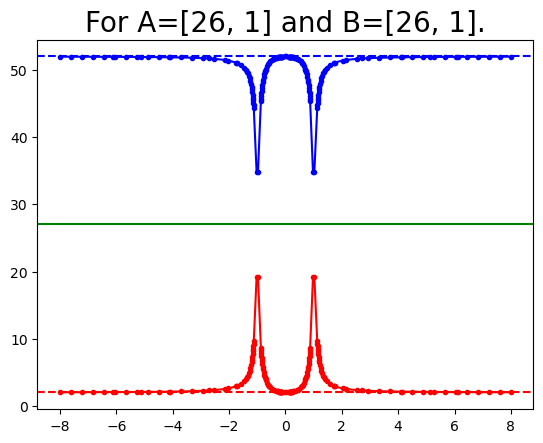

In [139]:
pA = [26, 1] #[1, 4, 1, 3] "[1, 8, 1, 1] [13, 2]
pB = [26, 1] 
real_plot_xLink(pA,pB, xmax=8, num=42)
complex_draw_xlink(pA,pB, bound=1.6, res=(640,640))
complex_draw_xlink(pB,pA, bound=1.6, res=(640,640))

In [ ]:
pA = [1, 4, 1, 3] # [1, 4, 1, 3] "[1, 8, 1, 1] [13, 2]
pB = [1, 4, 1, 3] # [26, 1] 
real_plot_xLink(pA,pB, xmax=8, num=42)
complex_draw_xlink(pA,pB, bound=1.6, res=(640,640))
complex_draw_xlink(pB,pA, bound=1.6, res=(640,640))

### Draw surface module(qlink(pA,pB,z))

In [142]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# import matplotlib.pyplot as plt
import pylab
# import numpy as np
import mpmath
mpmath.dps = 5


# f = lambda z: z

def draw_module_xLink(pA,pB):
    
    # Define domain and resolution
    bound = 1.2
    domain= [-bound,bound,-bound,bound]
    res = (480,480)
    
    # Define functions
    def zlkAB(z):
        try: 
            return(complex(xLink(pA,pB,z)))
        except:
            return np.nan    
    
    fig = pylab.figure()
    ax = Axes3D(fig)
    X = np.linspace(domain[0], domain[1], res[0])
    Y = np.linspace(domain[2], domain[3], res[1])
    X, Y = np.meshgrid(X, Y)
    xn, yn = X.shape
    W = X*0
    for xk in range(xn):
        for yk in range(yn):
            z = complex(X[xk,yk],Y[xk,yk])
            W[xk,yk] = np.absolute(zlkAB(z))
    
    ax.plot_surface(X, Y, W, rstride=1, cstride=1, cmap=cm.jet)
    plt.xlabel("Re")
    plt.ylabel("Im")
    ax.set_zlabel('module(f(z))')
    
    #pour changer l'angle de vue
    #ax.view_init(-140, 60)
    
    pylab.title("|qlink({},{})| for |q|<{}".format(pA,pB, bound))
    pylab.savefig("../Images/qLink({},{})_complex_{}x{}".format(pA,pB,res[0],res[1]))
    pylab.show()
    
    return(linking_from_cross_of_euclid(pA,pB))
    
    

ModuleNotFoundError: No module named 'mpmath'

### Matrices of bivarate invariants over class groups

In [ ]:
def bilinear_matrix(function_of_periods, sequence_of_periods):
    size = len(sequence_of_periods)
    bil_mat = pari.matrix(size, size)
    for i, p1 in enumerate(sequence_of_periods):
        for j, p2 in enumerate(sequence_of_periods):
            #w1 = RLword_of_euclid(p1)
            #w2 = RLword_of_euclid(p2)
            bil_mat[i,j]=function_of_periods(p1,p2)
    return bil_mat

In [ ]:
print(Discs, '\n')
# [60, 40, 316, 229, 876, 145, 780, 520, 1756, 401, 1708, 1384, 4348, 577, 1596, 1768]
disc = 1596 #4348
print(disc, '=', pari.factor(disc), '\n')
periods = perioDisc[disc]
# periods += [[1,2,3,4,5,6,7,8]] 
print(periods, '\n')

linking_matrix = bilinear_matrix(linking_from_cross_of_euclid, periods)
print('linking numbers : \n')
for row in linking_matrix:
    print(row)
print(pari.matdet(linking_matrix), '\n')

intersection_matrix = bilinear_matrix(intersection_from_cross_of_euclid, periods)
print('intersection numbers : \n')
for row in intersection_matrix:
    print(row)
print(pari.matdet(intersection_matrix), '\n')

antisym_link_mat = bilinear_matrix(antisym_link, periods)
print('lk(A,B)-lk(A,B^{-1}) : \n')
for row in antisym_link_mat:
    print(row)
print(pari.matdet(antisym_link_mat), '\n')

#cross_minus_rad2_mat = bilinear_matrix(cross_minus_rad2, periods)
#for row in cross_minus_rad2_mat:
#    print(row)
#print(pari.matdet(cross_minus_rad2_mat), '\n')

qlinking_matrix_1 = bilinear_matrix(lambda x,y : xLink(x,y,1), periods)
print('qlk(A,B).eval(q=1) : \n')
for row in qlinking_matrix_1 :
    print(row)
print(pari.matdet(qlinking_matrix_1), '\n')


qlinking_matrix_i = bilinear_matrix(lambda x,y : xLink(x,y,complex(pari('I'))), periods)
print('qlk(A,B).eval(q=i) : \n')
for row in qlinking_matrix_i :
    print(row)
print(pari.matdet(qlinking_matrix_i), '\n')

### Checking ultrametricity

In [ ]:
def is_ultrametric(w1, w2, w3, w4):
    
    p_l12_l34 = cross_word(w1, w2)*cross_word(w3, w4)
    p_l13_l24 = cross_word(w1, w3)*cross_word(w2, w4)
    p_l14_l23 = cross_word(w1, w4)*cross_word(w2, w3)
    
    print(p_l12_l34, p_l13_l24, p_l14_l23)
    
    b_l12_l34 = (p_l12_l34 >= min(p_l13_l24, p_l14_l23))
    b_l13_l24 = (p_l13_l24 >= min(p_l12_l34, p_l14_l23))
    b_l14_l23 = (p_l14_l23 >= min(p_l12_l34, p_l13_l24))
    
    return (b_l12_l34 and b_l13_l24 and b_l14_l23)

In [ ]:
w1 = 'RL'
w2 = 'RRL'
w3 = 'RRRLL'
w4 = 'RRRLLL'
is_ultrametric(w1,w2,w3,w4)

## Comparing linking with inverse and reverse

In [ ]:
def exchanged_LR(wordLR):
    wordTR = wordLR.replace('L','T')
    wordTL = wordTR.replace('R','L')
    wordRL = wordTL.replace('T','R')
    return wordRL

for period in perioDisc[40]:
    word = RLword_of_euclid(period)
    revword = exchanged_LR(word)[::-1]
    print('selflinking = ', cross_word(word, word), '\t',\
          'intersect=',  cross_word(word, revword),'\t', period)

for period in perioDisc[40]:
    F = pari.numerator(frickAlex(period)[0])
    T = pari.taylor(F, 'q', 1+ pari.poldegree(F)/2)
    #J = pari.subst(F,'q', '')
    print(period, '\t', T, '\n') #frickAlex(period)[0], '\n \t',

In [ ]:
def RH_from_RL(RL_word):
    RH_word = RL_word.replace('L','HR') 
    return(RH_word)

def HirzeJung_of_euclid(period):
    RLword = RLword_of_euclid(period)
    RHword = RH_from_RL(RLword)
    HirzeJung = []
    count = 0
    for C in RHword:
        if C=='R':
            count+=1
        if C=='H':
            HirzeJung.append(count)
            count = 1
    HirzeJung.append(count)
    return(HirzeJung)

In [ ]:
for period in perioDisc[876]:
    RLword = RLword_of_euclid(period)
    RHword = RH_from_RL(RLword)
    HirzeJung = HirzeJung_of_euclid(period)
    conthj = cont_frac_hj(1.*exact_first_root_of_form((form_of_matrix(matrix_of_euclid(period)))), 12)[0]
    print(RLword, '\n', period, '\n', RHword, '\n', HirzeJung, len(RHword), '\n', conthj, '\n\n')

## Linking from Rademacher

In [ ]:
def sequence_of_word(word):
    current_letter = 'R'
    exponents = [0]
    for c in word:
        if c == current_letter:
            exponents[-1] += 1
        else:
            current_letter = c
            exponents.append(1)
    return exponents

def list_of_circular_shifts(word):
    n = len(word)
    return ["".join([word[i - j] for i in range(n)]) for j in range(n,0,-1)]

In [ ]:
sequence_of_word('LLRLLLRRRRL')

In [ ]:
def sawtooth(x,precision):
    if x-np.floor(x) < precision or np.ceil(x)-x < precision :
        return(0)
    else :
        return(x-np.floor(x)-1/2)

def dedekind_sum(a,c):
    if c == 0:
        raise ValueError("c=0")
    precision = np.abs(1/(10*c))
    sd = 0
    for k in range(np.abs(c)):
        sd+= sawtooth(k/c, precision)*sawtooth(k*a/c, precision)
    return(sd)

def Rademacher_matrix(A):
    a = int(A[0,0])
    d = int(A[1,1])
    c = int(A[1,0])
    sd = pari.sumdedekind(a,c) #sd = pari.sumdedekind(d,c)
    trace_over_c = pari("({0}+{1})/{2}".format(a,d,c))
    rad = trace_over_c -12*pari.sign(c)*sd - 3*pari.sign(trace_over_c)
    return(rad)

In [ ]:
print(dedekind_sum(11,12), pari.sumdedekind(11,12)*1.)
period = [3,2,16,12]
print(matrix_of_euclid(period))
print(Rademacher(period), Rademacher_matrix(matrix_of_euclid(period)))

In [ ]:
def meyer(wordA,wordB):
    matA = matrix_of_euclid(sequence_of_word(wordA))
    matB = matrix_of_euclid(sequence_of_word(wordB))
    if wordA < wordB :
        invBxA = pari.matadjoint(matB)*matA
        #middle = try Rademacher_matrix(invBxA) except invBxA[0,1]/invBxA[1,1]
        cocycle = -Rademacher_matrix(matA)+Rademacher_matrix(invBxA)+Rademacher_matrix(matB)
    if wordA > wordB :
        invAxB = pari.matadjoint(matA)*matB
        cocycle = Rademacher_matrix(matA)+Rademacher_matrix(invAxB)-Rademacher_matrix(matB)
    return (6-cocycle)/6

def linking_rademacher(periodA,periodB):
    wordA = RLword_of_euclid(periodA)
    shiftsA = list_of_circular_shifts(wordA)
    wordB = RLword_of_euclid(periodB)
    shiftsB = list_of_circular_shifts(wordB)
    
    linking = 0
    
    for shiftA in shiftsA:
        for shiftB in shiftsB:            
            
            if shiftA[0] != shiftB[0]:
                linking += meyer(shiftA, shiftB)            
    
    return linking/2

In [59]:
p1 = [1,2,2,1,265,1,2,2,1,265] #[0,4,2,3,7,6,7,8,9]
p2 = [1,21,3,4,8,1,21,3,4,8] #[1,5,2,3,7,6,7,8,9]

cross_word(RLword_of_euclid(p1),RLword_of_euclid(p2)), linking_rademacher(p1, p2)

NameError: name 'cross_word' is not defined

### Experimenting with Rademacher cocycle

In [60]:
periodA = [0,3,2,3,7,6,7,8,9]
periodB = [1,5,2,3,7,6,7,8,9]

matA = matrix_of_euclid(periodA)
matB = matrix_of_euclid(periodB)

invBxA = pari.matadjoint(matB)*matA
invAxB = pari.matadjoint(matA)*matB
AxinvB = matA*pari.matadjoint(matB)
BxinvA = matB*pari.matadjoint(matA)

cocycle1 = -Rademacher_matrix(matA) + Rademacher_matrix(AxinvB) + Rademacher_matrix(matB)
cocycle2 = Rademacher_matrix(matA) + Rademacher_matrix(BxinvA) - Rademacher_matrix(matB)

print(cocycle1)
print(cocycle2 , '\n')

print(Rademacher_matrix(AxinvB), '\t', Rademacher_matrix(invBxA))
print(Rademacher_matrix(BxinvA), '\t', Rademacher_matrix(invAxB))

NameError: name 'pari' is not defined

In [124]:
def matrix_of_HJword(word):

    H1 = pari("[1,-1;1,0]")
    R1 = pari("[1,1;0,1]")

    mat = pari("[1,0;0,1]")
    for c in word:
        if c =='R':
            mat=mat*R1
        elif c =='H' :
            mat=mat*H1
    return(mat)

def intersection_rademacher(periodA,periodB):
    wordA = RH_from_RL(RLword_of_euclid(periodA))
    shiftsA = list_of_circular_shifts(wordA)
    wordB = RH_from_RL(RLword_of_euclid(periodB))
    shiftsB = list_of_circular_shifts(wordB)
    
    interad = 0
    
    for shiftA in shiftsA:
        for shiftB in shiftsB:            
            
            if (shiftA[0] != shiftB[0]) : # & (shiftA[-1] != 'H') & (shiftB[-1] != 'H') :
                matA = matrix_of_HJword(shiftA)
                matB = matrix_of_HJword(shiftB)
                if shiftA < shiftB :
                    invBxA = pari.matadjoint(matB)*matA
                    cocycle = -Rademacher_matrix(matA)+Rademacher_matrix(invBxA)+Rademacher_matrix(matB)
                if shiftA > shiftB :
                    invAxB = pari.matadjoint(matA)*matB
                    cocycle = Rademacher_matrix(matA)+Rademacher_matrix(invAxB)-Rademacher_matrix(matB)
                interad += (6-cocycle)/6
    
    return interad/2

In [125]:
p1 = [1,2,1,1,1,34,15,6]
p2 = [1,5,2,3]
RLw1 = RLword_of_euclid(p1)
RLw2 = RLword_of_euclid(p2)
print(cross_word(RLw1,RLw2), linking_rademacher(p1, p2))
print(cross_word(RH_from_RL(RLw1),RH_from_RL(RLw2)), intersection_rademacher(p1,p2))

28 28
372 372


In [126]:
# Compare results for linking and intersection 
# with functions cross and with Rad

#print(Discs)
disc = 1596 #577
print(perioDisc[disc], '\n')
linking_matrix_cross = bilinear_matrix(linking_from_cross_of_euclid, perioDisc[disc])
intersection_matrix_cross = bilinear_matrix(intersection_from_cross_of_euclid, perioDisc[disc])

linking_matrix_rad = bilinear_matrix(linking_rademacher, perioDisc[disc])
intersection_matrix_rad = bilinear_matrix(intersection_rademacher, perioDisc[disc])

for row in linking_matrix_cross:
    print(row)
print(pari.matdet(linking_matrix_cross), '\n')

for row in linking_matrix_rad:
    print(row)
print(pari.matdet(linking_matrix_rad), '\n\n')

for row in intersection_matrix_cross:
    print(row)
print(pari.matdet(intersection_matrix_cross), '\n')

for row in intersection_matrix_rad:
    print(row)
print(pari.matdet(intersection_matrix_rad))

[[38, 1], [19, 2], [3, 1, 2, 3], [7, 2, 1, 1], [1, 12, 1, 1], [1, 4, 1, 5], [3, 3, 2, 1], [7, 1, 1, 2]] 

[38, 19, 5, 8, 2, 2, 5, 8]~
[19, 20, 7, 10, 4, 4, 7, 10]~
[5, 7, 12, 10, 7, 8, 13, 10]~
[8, 10, 10, 12, 6, 6, 10, 13]~
[2, 4, 7, 6, 16, 13, 7, 6]~
[2, 4, 8, 6, 13, 18, 8, 6]~
[5, 7, 13, 10, 7, 8, 12, 10]~
[8, 10, 10, 13, 6, 6, 10, 12]~
4221237 

[38, 19, 5, 8, 2, 2, 5, 8]~
[19, 20, 7, 10, 4, 4, 7, 10]~
[5, 7, 12, 10, 7, 8, 13, 10]~
[8, 10, 10, 12, 6, 6, 10, 13]~
[2, 4, 7, 6, 16, 13, 7, 6]~
[2, 4, 8, 6, 13, 18, 8, 6]~
[5, 7, 13, 10, 7, 8, 12, 10]~
[8, 10, 10, 13, 6, 6, 10, 12]~
4221237 


[39, 21, 9, 11, 15, 11, 9, 11]~
[21, 23, 13, 15, 19, 15, 13, 15]~
[9, 13, 23, 19, 16, 18, 25, 19]~
[11, 15, 19, 19, 17, 19, 19, 21]~
[15, 19, 16, 17, 20, 17, 16, 17]~
[11, 15, 18, 19, 17, 22, 18, 19]~
[9, 13, 25, 19, 16, 18, 23, 19]~
[11, 15, 19, 21, 17, 19, 19, 19]~
3366656 

[39, 21, 9, 11, 15, 11, 9, 11]~
[21, 24, 15, 16, 30, 22, 15, 16]~
[9, 15, 28, 22, 59, 44, 29, 22]~
[11, 16, 22, 21, 45, 33,

## Modular Braids and torus bundles

In [127]:
import snappy as snap
import sage
# ! pip install snappy

In [128]:
#C, Id = snap.RationalTangle(1), snap.IdentityBraid(1)
#Lb = C | Id
#Rb = Id | -C

In [129]:
def link_of_euclid(period):

    braid = snap.IdentityBraid(3)
    
    for k,n in enumerate(period):
        if k%2==0 :
            braid *= (snap.IdentityBraid(1)|-snap.RationalTangle(n))
        elif k%2==1 :
            braid *= (snap.RationalTangle(n)|snap.IdentityBraid(1))
    
    link = braid.denominator_closure()
    
    return(link)

def torus_bundle_euclid(period):
    exterior = link.exterior(period)
    four_punctured_sphere_bundle = snap.Manifold(exterior)
    four_punctured_torus_bundle = sphere_bundle.double()
    return(torus_bundle)

def punctorus_bundle_euclid(period):
    word = RLword_of_euclid(period)
    punctorus_bundle = snap.Manifold('b++'+ word)
    return(punctorus_bundle)

In [130]:
Eight = link_of_euclid([1,1,1,1])
Ext = Eight.exterior()
snap.Manifold('4_1').is_isometric_to(Ext)

True

In [131]:
print(perioDisc[60])

[[6, 1], [3, 2]]


In [132]:
# L = link_of_euclid([2, 2, 590, 2])
word1 = RLword_of_euclid([1,2,2,1,265,1,2,2,1,265])
word2 = RLword_of_euclid([1,21,3,4,8,1,21,3,4,8])
M = snap.Manifold('b++'+ word1)
M.volume()

16.5908388

In [133]:
M.browse()
%gui tk

Linking GLSL program 'image shader' failed.
b'error: Too many fragment shader default uniform block components\nerror: Uniform block MargulisTubes too big (69376/65536)\nerror: Uniform block TetCuspMatrices too big (277504/65536)\nerror: Uniform block TetrahedraBasics too big (208128/65536)\n'
Most likely causes:
 * The triangulation has too many tetrahedra
   (given the number of uniforms your graphics card supports).
 * Your graphics card does not support the required OpenGL version.
   Required version      Your version
   OpenGL:  3.2             4.6 (Core Profile) Mesa 21.2.6
     GLSL:  1.50            4.60
Exception while trying to compute maximal cusp area: Manifold has non-geometric solution type 'contains degenerate tetrahedra'.


In [134]:
link_of_euclid([1, 1, 6, 3, 13, 1]).alexander_polynomial()

SageNotAvailable: Sorry, this feature requires using SnapPy inside Sage.

# Combinatorics

## Topograph

We now reconstruct the shape and values surrounding the river in the topograph of a quadratic form. This amounts to computing the Gauss reduced representatives in the class of a given quadratic form. The result will be printed as a sequence of $[(a,c),L]$ or $[(a,c), R]$ which means we are on the edge of the river with $a$ on the left, $c$ on the right, and the next turn is to the Right or Left respectively (the inversion is not a mistake and is inherent to the orientations of the actions of $L$ and $R$, which are not the same for the tautological reprentation on the euclidean plane and on the hyprbolic plane).

In [ ]:
def matrix_of_word(word):

    L1 = np.matrix([[1,0],[1,1]])
    R1 = np.matrix([[1,1],[0,1]])
    mat = np.matrix([[1,0],[0,1]])
    
    for C in word:
        if C == 'L':
            mat=mat*L1
        elif C == 'R':
            mat=mat*R1
    return(mat)

def list_of_circular_shifts(word):
    n = len(word)
    return ["".join([word[i - j] for i in range(n)]) for j in range(n,0,-1)]

def river_of_euclid(period):
    
    word = RLword_of_euclid(period)
    shifts = list_of_circular_shifts(word)
    
    river = []
    
    for shift in shifts:
        mat = matrix_of_word(shift)
        l, m, r = mat[1,0], mat[1,1]-mat[0,0], -mat[0,1]
        u = np.gcd(l, np.gcd(m, r))
        river.append([(l//u, r//u), shift[0]])
    return river

def reduced_Gauss_river_of_euclid(period):
    
    word = RLword_of_euclid(period)
    shifts = list_of_circular_shifts(word)
    
    reduced = []
    
    for shift in shifts:
        mat = matrix_of_word(shift)
        l, m, r = mat[1,0], mat[1,1]-mat[0,0], -mat[0,1]
        u = np.gcd(l, np.gcd(m, r))
        reduced.append([(l//u,m//u,r//u), shift])
    return reduced

We may now display the rivers of the quadratic forms in each discriminant.

In [ ]:
for disc in perioDisc.keys():
    print('\n\n', disc)
    for period in perioDisc[disc]:
        print('\n', period)
        #print(river_of_euclid(period),'\n')
        for form in river_of_euclid(period):
        #for form in reduced_Gauss_river_of_euclid(period):
            print(form)

## Gauss diagrams and interlace graphs

## Brainstorm and Garbage

In [ ]:
# MARKOV QUADRATIC IRRATIONALITIES

def M(x,y,z) :
    #w = pari.quadgen(9*z-4)
    return(1/2+3*y/(x*y)+3*sqrt(z**2-4)/(2*z))

def C(x,y,z):
    return pari.contfrac(M(x,y,z)*1.)

In [ ]:
# Choose a discriminant
disc = 780
print(pari.contfrac(pari.sqrt(disc/4)))

# Look at unit
Unit = pari.quadunit(disc)
pari.norm(Unit)
print(pari.contfrac(Unit*1.))

# Display class group structure
ClDisc = pari.quadclassunit(disc)
print(ClDisc)

# Construct a matrix to accomodate class group
Size = ClDisc[1]
QDisc = pari.matrix(Size[0], Size[1])

# Put the displayed generators in their places
Generators = ClDisc[2]
QDisc[0,0] = Generators[0]**0

QDisc[0,1] = Generators[1]**1
QDisc[1,0] = Generators[0]**1

# Fill in with products
QDisc[1,1] = QDisc[1,0]*QDisc[0,1]

print(QDisc)

# First roots of quadratic forms
PhiDisc = QDisc
for i in range(Size[0]):
    for j in range(Size[1]):
        PhiDisc[i,j]= exact_first_root_of_form(QDisc[i,j])
print(PhiDisc)

# Continued fraction for first roots of quadratic forms
ContPhiDisc = QDisc
for i in range(Size[0]):
    for j in range(Size[1]):
        ContPhiDisc[i,j]= pari.contfrac(PhiDisc[i,j]*1.,24)
print(ContPhiDisc)

In [135]:
# Choose a discriminant
disc = 1768
print(pari.contfrac(pari.sqrt(disc/4)))

# Look at unit
Unit = pari.quadunit(disc)
pari.norm(Unit)
print(pari.contfrac(Unit*1.))

# Display class group structure
ClDisc = pari.quadclassunit(disc)
print(ClDisc)

# Construct a matrix to accomodate class group
Size = ClDisc[1]
QDisc = pari.matrix(Size[0], Size[1])

# Put the displayed generators in their places
Generators = ClDisc[2]
QDisc[0,0] = Generators[1]**0

QDisc[0,1] = Generators[1]**1
QDisc[1,0] = Generators[0]**1

QDisc[2,0] = Generators[0]**2
QDisc[3,0] = (Generators[0]**3)

# Fill in with products
QDisc[1,1] = QDisc[1,0]*QDisc[0,1]
QDisc[2,1] = QDisc[2,0]*QDisc[0,1]
QDisc[3,1] = QDisc[3,0]*QDisc[0,1]

print(QDisc)

# First roots of quadratic forms
PhiDisc = QDisc
for i in range(Size[0]):
    for j in range(Size[1]):
        PhiDisc[i,j]= exact_first_root_of_form(QDisc[i,j])
print(PhiDisc)

# Continued fraction for first roots of quadratic forms
ContPhiDisc = QDisc
for i in range(Size[0]):
    for j in range(Size[1]):
        ContPhiDisc[i,j]= pari.contfrac(PhiDisc[i,j]*1.,24)
print(ContPhiDisc)

Your new Browser window needs an event loop to become visible.
Type "%gui tk" below (without the quotes) to start one.

[21, 42, 42, 42, 42, 42]
[42, 42, 42, 42, 42, 42]
[8, [4, 2], [Qfb(3, 38, -27, 0.E-19), Qfb(21, 40, -2, 0.E-19)], 3.73823603026154]
[Qfb(1, 42, -1, 0.E-19), Qfb(21, 40, -2, 0.E-19); Qfb(3, 38, -27, 0.E-19), Qfb(7, 40, -6, 0.E-19); Qfb(9, 38, -9, 0.E-18), Qfb(-13, 26, 21, 0.722324265796700); Qfb(27, 38, -3, 0.E-18), Qfb(-6, 40, 7, -0.400668948866593)]
[-21 + w, -20/21 + 1/21*w; -19/3 + 1/3*w, -20/7 + 1/7*w; -19/9 + 1/9*w, 1 - 1/13*w; -19/27 + 1/27*w, 10/3 - 1/6*w]
[[0, 42, 42, 42, 42, 42, 27, 3], [0, 20, 1, 1, 20, 1, 1, 20, 1, 1, 20, 1, 1, 20, 1, 1, 20, 4]; [0, 1, 2, 13, 1, 2, 13, 1, 2, 13, 1, 2, 13, 1, 2, 13, 1, 2, 9], [0, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 3]; [0, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2], [-1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2]; [0, 13, 2, 1, 13, 2, 1, 13, 2, 1, 13, 2, 1, 13, 2, 1, 13, 4], [-1,